# Import libraries and pakages

In [1]:

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Data handling
import pandas as pd
pd.set_option('display.max_columns', None)
import openpyxl
import numpy as np
from zipfile import ZipFile
import zipfile

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
from plotly.subplots import make_subplots

# EDA (pandas-profiling, etc. )
import scipy.stats as stats
from statsmodels.tsa.stattools import kpss
from scipy.stats import t, ttest_ind, chi2_contingency


# Feature Processing (Scikit-learn processing, etc. )
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Other packages
import os, pickle

# Data Loading

In [2]:
# Read CSV and change date column from object to date type

holidays=pd.read_csv("holidays_events.csv", parse_dates =['date'])
oil=pd.read_csv("oil.csv", parse_dates =['date'])
sample=pd.read_csv("sample_submission.csv")
stores=pd.read_csv("stores.csv")
test=pd.read_csv("test.csv", parse_dates =['date'])
train=pd.read_csv("train.csv", parse_dates =['date'])
transactions=pd.read_csv("transactions.csv", parse_dates =['date'])

# Exploratory Data Analysis
Training data

In [3]:
# view first 5 rows
train.head()

id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0

In [4]:
# view info
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


Features and descriptions of train and test dataset



store_nbr	identifies the store at which the products are sold.

family identifies the type of product sold.

sales	gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).

onpromotion	gives the total number of items in a product family that were being promoted at a store at a given date.

In [5]:
train.describe()

id                           date     store_nbr  \
count  3.000888e+06                        3000888  3.000888e+06   
mean   1.500444e+06  2015-04-24 08:27:04.703088384  2.750000e+01   
min    0.000000e+00            2013-01-01 00:00:00  1.000000e+00   
25%    7.502218e+05            2014-02-26 18:00:00  1.400000e+01   
50%    1.500444e+06            2015-04-24 12:00:00  2.750000e+01   
75%    2.250665e+06            2016-06-19 06:00:00  4.100000e+01   
max    3.000887e+06            2017-08-15 00:00:00  5.400000e+01   
std    8.662819e+05                            NaN  1.558579e+01   

              sales   onpromotion  
count  3.000888e+06  3.000888e+06  
mean   3.577757e+02  2.602770e+00  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  
50%    1.100000e+01  0.000000e+00  
75%    1.958473e+02  0.000000e+00  
max    1.247170e+05  7.410000e+02  
std    1.101998e+03  1.221888e+01

In [6]:
# Check for missing values using isna()
missing_values = train.isna().sum()
print(missing_values)

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64


In [7]:
# Count missing values in each column
missing_counts = missing_values.sum()
print(missing_counts)

0


In [8]:
# Check if there are any missing values in the entire DataFrame
any_missing = missing_values.any().any()
print("\nAre there any missing values in the DataFrame?", any_missing)


Are there any missing values in the DataFrame? False


In [9]:
# format numerical columns to 2 decimal places with comma separator
pd.options.display.float_format = '{:,.2f}'.format

# statistics for numerical columns
train.describe()

id                           date    store_nbr        sales  \
count 3,000,888.00                        3000888 3,000,888.00 3,000,888.00   
mean  1,500,443.50  2015-04-24 08:27:04.703088384        27.50       357.78   
min           0.00            2013-01-01 00:00:00         1.00         0.00   
25%     750,221.75            2014-02-26 18:00:00        14.00         0.00   
50%   1,500,443.50            2015-04-24 12:00:00        27.50        11.00   
75%   2,250,665.25            2016-06-19 06:00:00        41.00       195.85   
max   3,000,887.00            2017-08-15 00:00:00        54.00   124,717.00   
std     866,281.89                            NaN        15.59     1,102.00   

       onpromotion  
count 3,000,888.00  
mean          2.60  
min           0.00  
25%           0.00  
50%           0.00  
75%           0.00  
max         741.00  
std          12.22

 plotting frequencies of data point on yearly/monthly basis

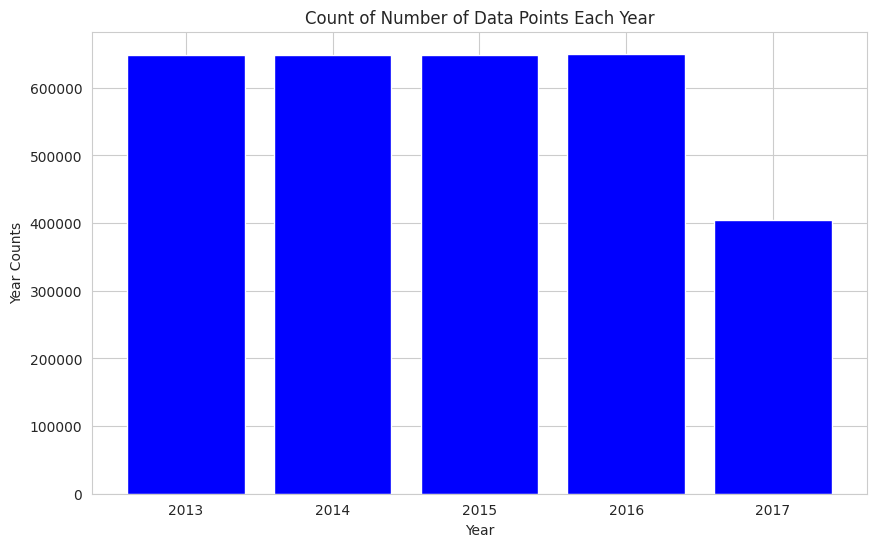

In [10]:
# copy train dataset so that we work with a copy, not the original
train_copy = train.copy()

# extracting the year column
train_copy['year'] = pd.to_datetime(train['date']).dt.year

# Grouping by year and count the data points
year_data = train_copy.groupby('year').size().reset_index(name='counts')

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(year_data['year'], year_data['counts'], color='blue')
ax.set_xticks(year_data['year'])
ax.set_title('Count of Number of Data Points Each Year')
ax.set_xlabel('Year')
ax.set_ylabel('Year Counts')

plt.show()

There has been a uniformity of data counts from 2013-2016 but the count dropped in 2017

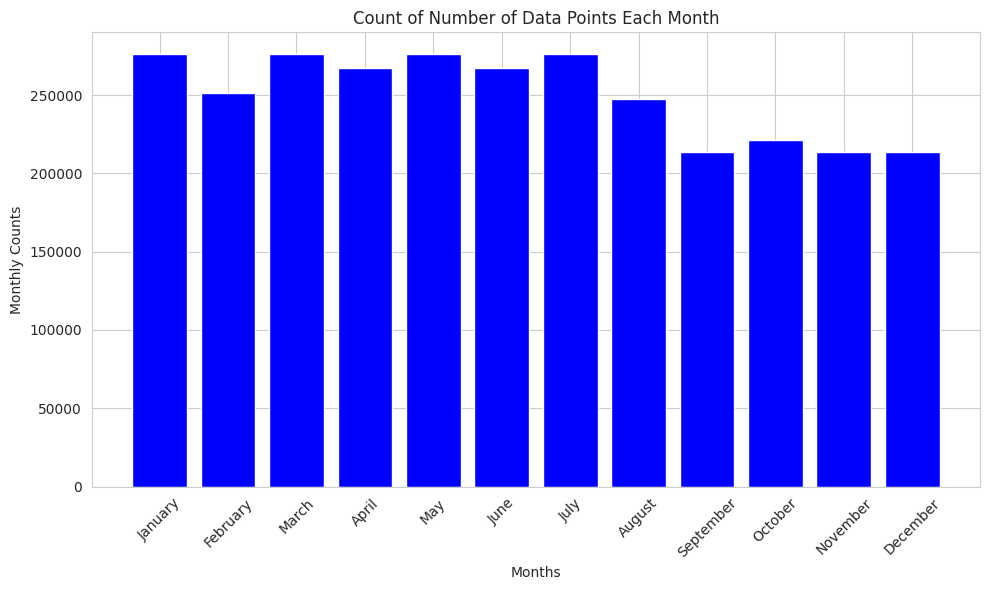

In [11]:
# extracting the month
train_copy['month'] = pd.to_datetime(train_copy['date']).dt.month

# Grouping by month and count the data points
monthly_data = train_copy.groupby('month').size().reset_index(name='counts')

# Renaming the month values for labeling
month_names = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_data['month'] = monthly_data['month'].apply(lambda x: month_names[x - 1])

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(monthly_data['month'], monthly_data['counts'], color='blue')
ax.set_title('Count of Number of Data Points Each Month')
ax.set_xlabel('Months')
ax.set_ylabel('Monthly Counts')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels are not cut off
plt.show()

There is some uniformity in distribution of datapoints across the months

Total sales by store

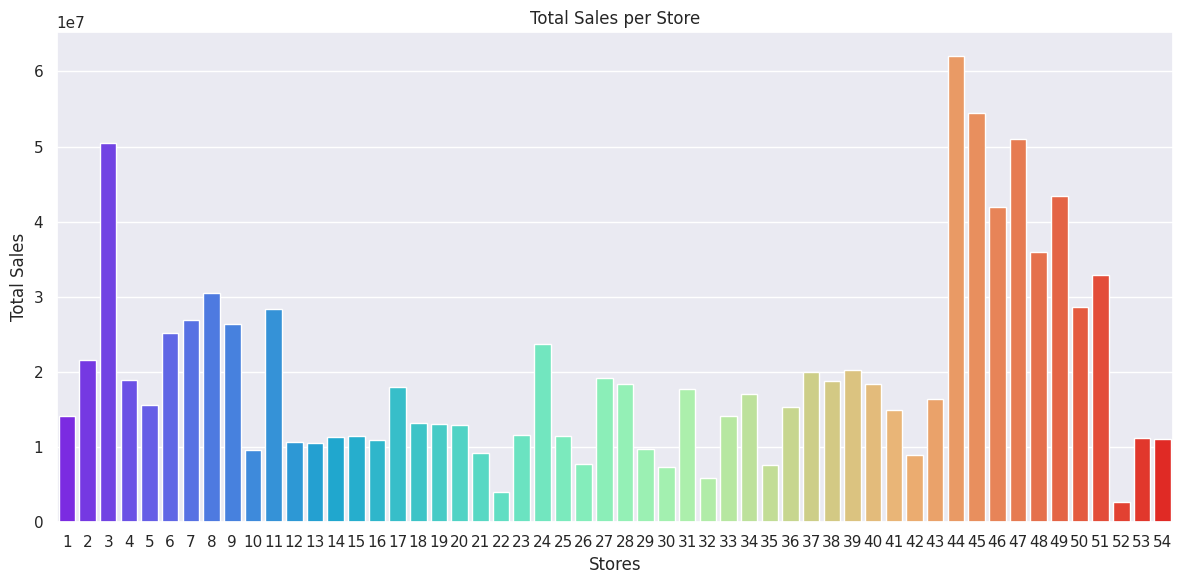

In [12]:
# Filter rows where unit_sales > 0
train_copy = train_copy[train['sales'] > 0]

# Group by 'store_nbr' and calculate the sum of 'unit_sales'
store_unit_sales = train_copy.groupby('store_nbr')['sales'].sum().reset_index()

# Set the figure size
sns.set(rc={'figure.figsize': (12, 6)})

# Create a barplot
sns.barplot(x='store_nbr', y='sales', data=store_unit_sales, palette='rainbow')

# Set titles and labels
plt.title('Total Sales per Store')
plt.xlabel('Stores')
plt.ylabel('Total Sales')

# Show the plot
plt.tight_layout()
plt.show()

We can say Store number 3,44,45,46,47,48,49, 51 have the highest volume of sales

Unit sales daily

In [13]:

# Filter rows where unit_sales > 0
train_copy = train_copy[train_copy['sales'] > 0]

# Group by 'date' and calculate the sum of 'sales'
sales_date_agg = train_copy.groupby('date')['sales'].sum().reset_index()

# Create a lineplot using Plotly Express
fig = px.line(sales_date_agg, x='date', y='sales', title='Plot of Total Sales Over Time (Daily)')
fig.update_layout(width=1200, height=600)

# Add a range slider
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
# Show the plot
fig.show()


upward trend year on year

***Test data***

The test data, has the same features as the training data, except sales, which we will predict the target sales for the dates in this file.

The dates in the test data are for the 15 days after the last date in the training data.

In [14]:
# view first 5 rows
test.head()

id       date  store_nbr      family  onpromotion
0  3000888 2017-08-16          1  AUTOMOTIVE            0
1  3000889 2017-08-16          1   BABY CARE            0
2  3000890 2017-08-16          1      BEAUTY            2
3  3000891 2017-08-16          1   BEVERAGES           20
4  3000892 2017-08-16          1       BOOKS            0

In [15]:
# view info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [16]:
# check for missing values

test.isna().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [17]:
test.describe()

id                 date  store_nbr  onpromotion
count    28,512.00                28512  28,512.00    28,512.00
mean  3,015,143.50  2017-08-23 12:00:00      27.50         6.97
min   3,000,888.00  2017-08-16 00:00:00       1.00         0.00
25%   3,008,015.75  2017-08-19 18:00:00      14.00         0.00
50%   3,015,143.50  2017-08-23 12:00:00      27.50         0.00
75%   3,022,271.25  2017-08-27 06:00:00      41.00         6.00
max   3,029,399.00  2017-08-31 00:00:00      54.00       646.00
std       8,230.85                  NaN      15.59        20.68

***Transactions Dataset***

Contains date, store_nbr and transaction made on that specific date.

In [18]:
# view first 5 rows
transactions.head()

date  store_nbr  transactions
0 2013-01-01         25           770
1 2013-01-02          1          2111
2 2013-01-02          2          2358
3 2013-01-02          3          3487
4 2013-01-02          4          1922

In [19]:
# view info
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [20]:
# check for missing values

transactions.isna().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [21]:
# Visualize transactions over the years with plotly

fig = px.line(transactions, y="transactions",x='date', title="Transaction data over time")

# enable range slider with range selector
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

Big spikes is transactions in december every year; indicates seasonality


***Stores Dataset***

Store metadata, including city, state, type, and cluster.

cluster is a grouping of similar stores.

In [22]:
# view first 5 rows
stores.head()

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

In [23]:
# view info
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [24]:
# check for missing values

stores.isna().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

***Oil Dataset***

Daily oil price which includes values during both the train and test data timeframes. (Ecuador is an oil-dependent country and its economical health is highly vulnerable to shocks in oil prices.)

In [25]:
# view first 5 rows
oil.head()

date  dcoilwtico
0 2013-01-01         NaN
1 2013-01-02       93.14
2 2013-01-03       92.97
3 2013-01-04       93.12
4 2013-01-07       93.20

In [26]:
# view info
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [27]:
# check for missing values

oil.isna().sum()

date           0
dcoilwtico    43
dtype: int64

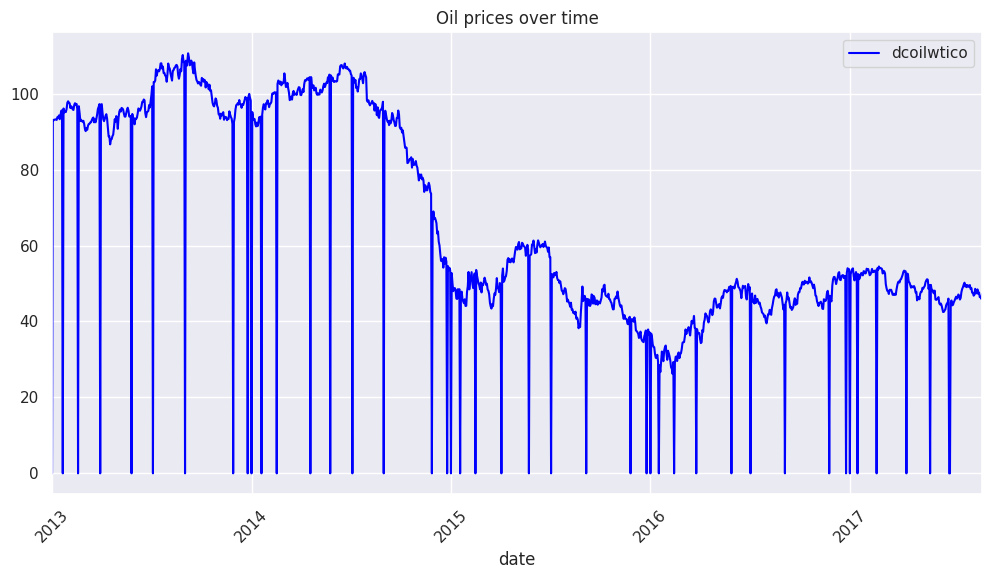

In [28]:
# Oil prices over time

ax = oil.groupby(['date'], as_index=False)["dcoilwtico"].sum().plot(
    "date", "dcoilwtico", figsize=(12,6), title="Oil prices over time", color='blue')

plt.tick_params(axis='x', labelrotation=45)

***Holiday/Events Dataset***



*   Holidays and Events, with metadata



NOTE: Pay special attention to the transferred column. A holiday that is transferred officially falls on that calendar day but was moved to another date by the government. A transferred day is more like a normal day than a holiday. To find the day that it was celebrated, look for the corresponding row where type is Transfer.

For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12. Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend). These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday) that is meant to payback the Bridge.

*   Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday).

In [29]:
# view forst 5 rows
holidays.head()

date     type    locale locale_name                    description  \
0 2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1 2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2 2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3 2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4 2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

In [30]:
# view info
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [31]:
# check for missing values

holidays.isna().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

# Analytical Questions

**1. Is the train dataset complete (has all the required dates)?**

In [32]:
# Check for missing values
if train.isnull().values.any():
  print("The dataset is not complete. There are missing values.")
else:
  print("The dataset is complete.")


The dataset is complete.


The dataset has no missing value. However let's check the completion of the dates.

***Date completion***

In [33]:
# Checking for completeness of the dates
# Min and max dates (range of dates)

train.date.min(), train.date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

In [34]:
# Actual recorded number of days in train dataset

train['date'].nunique()

1684

In [35]:
# range between min and max dates

min_date = train['date'].min()
max_date = train['date'].max()
days_range = pd.date_range(start=min_date, end=max_date)
num_days = len(days_range)
num_days

1688

In [36]:
expected_dates = pd.date_range(start=min_date, end=max_date)
expected_dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', length=1688, freq='D')

In [37]:
# Missing dates

missing_dates = expected_dates.difference(train['date'].unique())
missing_dates

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)

The train dataset is mising 4 dates.These missing dates follow a pattern (december 25th) from 2013-2016. This date is a worldwide holiday, and also a holiday in Ecuador.

The assumption is that no data was collected on this day every year as the shops may be closed down on christmas each year.

In [38]:
missing_df = list(missing_dates)
print(pd.DataFrame(missing_df))

           0
0 2013-12-25
1 2014-12-25
2 2015-12-25
3 2016-12-25


In [39]:
train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

In [40]:
# Add missing dates in a DataFrame

new_dates = pd.DataFrame(missing_df, columns = ['date'])
new_dates

date
0 2013-12-25
1 2014-12-25
2 2015-12-25
3 2016-12-25

let us add the missing dates to the train dataset

In [41]:
train = pd.concat([train, new_dates], ignore_index=False)
train

id       date  store_nbr      family  sales  onpromotion
0               0.00 2013-01-01       1.00  AUTOMOTIVE   0.00         0.00
1               1.00 2013-01-01       1.00   BABY CARE   0.00         0.00
2               2.00 2013-01-01       1.00      BEAUTY   0.00         0.00
3               3.00 2013-01-01       1.00   BEVERAGES   0.00         0.00
4               4.00 2013-01-01       1.00       BOOKS   0.00         0.00
...              ...        ...        ...         ...    ...          ...
3000887 3,000,887.00 2017-08-15       9.00     SEAFOOD  16.00         0.00
0                NaN 2013-12-25        NaN         NaN    NaN          NaN
1                NaN 2014-12-25        NaN         NaN    NaN          NaN
2                NaN 2015-12-25        NaN         NaN    NaN          NaN
3                NaN 2016-12-25        NaN         NaN    NaN          NaN

[3000892 rows x 6 columns]

In [42]:
train.isna().sum()

id             4
date           0
store_nbr      4
family         4
sales          4
onpromotion    4
dtype: int64

we now have some missing values due to adding missing dates. we will deal with these later on.


**2. Which dates have the lowest and highest sales for each year?**

In [43]:
# Highest sales date in each year

train_copy['year'] = train_copy['date'].dt.year
max_sales = train_copy.groupby('year')['sales'].idxmax()
Result_max = train.loc[max_sales]
Result_max

id       date  store_nbr     family      sales  onpromotion
562596    562,596.00 2013-11-12      44.00  GROCERY I  46,271.00         0.00
1257246 1,257,246.00 2014-12-08      35.00  GROCERY I  45,361.00         3.00
1916586 1,916,586.00 2015-12-14      35.00  GROCERY I  40,351.46         7.00
2163723 2,163,723.00 2016-05-02       2.00  GROCERY I 124,717.00        59.00
2760297 2,760,297.00 2017-04-02       9.00  GROCERY I  38,422.62        73.00

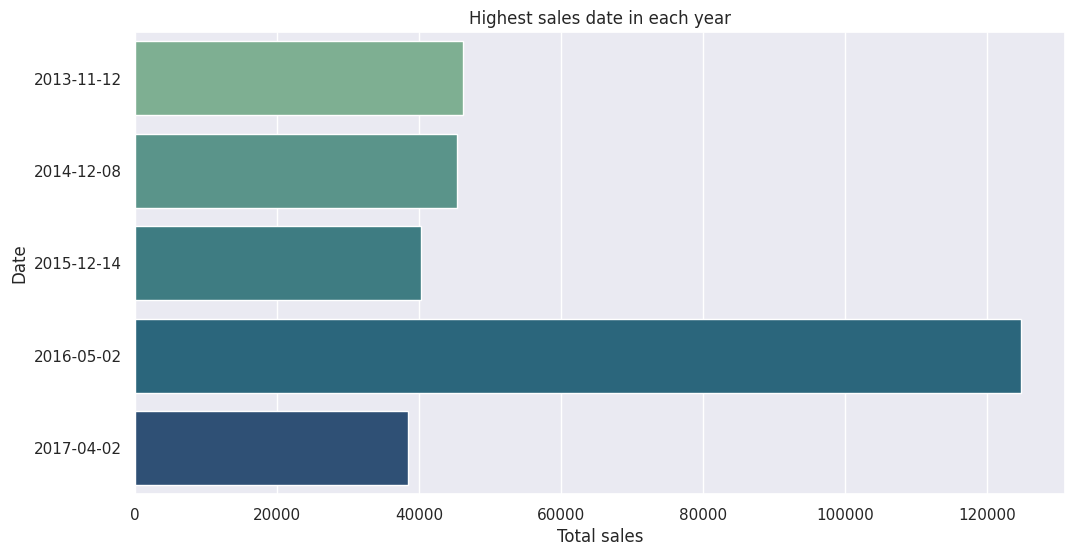

In [44]:
# Horizontal bar chart of dates with highest sales each year

sns.barplot(data=Result_max, y="date", x="sales", palette='crest')
plt.ylabel("Date")
plt.xlabel("Total sales")
plt.title("Highest sales date in each year")
plt.show()

2016(11/12) has the highest number of sales (124,717)

In [45]:

# lowest sales date in each year

min_sales = train_copy.groupby('year')['sales'].idxmin()
Result_min = train.loc[min_sales]
Result_min


id       date  store_nbr   family  sales  onpromotion
387782    387,782.00 2013-08-06      39.00  SEAFOOD   0.12         0.00
1252052 1,252,052.00 2014-12-05      39.00  SEAFOOD   0.19         0.00
1756358 1,756,358.00 2015-09-15      39.00  SEAFOOD   0.20         0.00
2256638 2,256,638.00 2016-06-23      26.00  SEAFOOD   0.40         1.00
2666498 2,666,498.00 2017-02-09      26.00  SEAFOOD   0.43         0.00

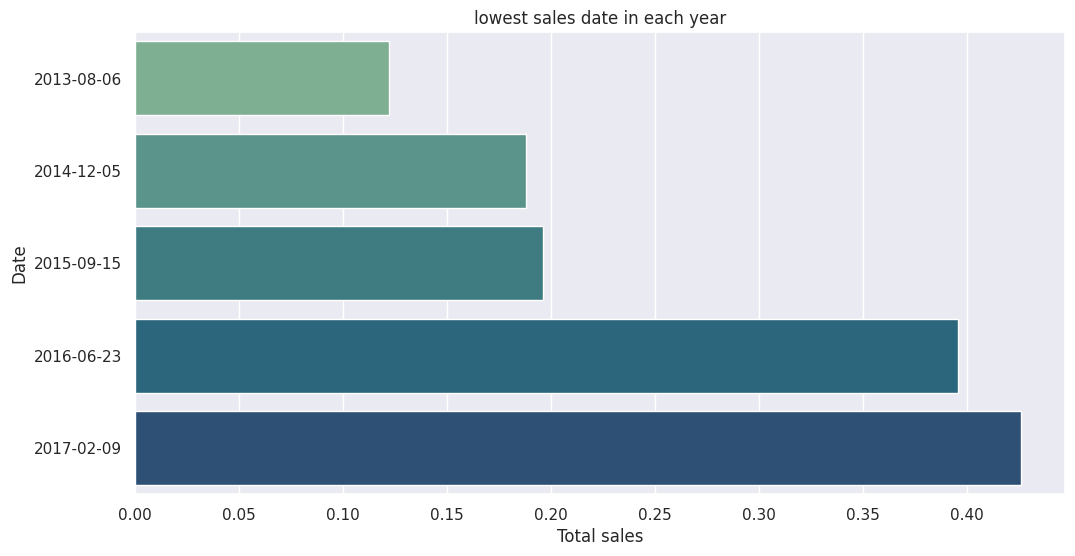

In [46]:
# Horizontal bar chart of dates with lowest sales each year

sns.barplot(data=Result_min, y="date", x="sales", palette='crest')
plt.ylabel("Date")
plt.xlabel("Total sales")
plt.title("lowest sales date in each year")
plt.show()

2013(08/06) has the lowest number of sales (0.12)


**3. Did the earthquake impact sales?**

The 2016 Ecuador earthquake occurred on April 16 at 18:58:37 ECT with a moment magnitude of 7.8

In [47]:
# Set the 'date' column as the index

train_copy.set_index('date', inplace=True)

# Resample to weekly frequency, aggregating with mean

sales_daily_mean = train_copy["sales"].resample('D').mean()
sales_weekly_mean = train_copy["sales"].resample('W').mean()

Text(0.5, 1.0, 'April and May 2016 total sales')

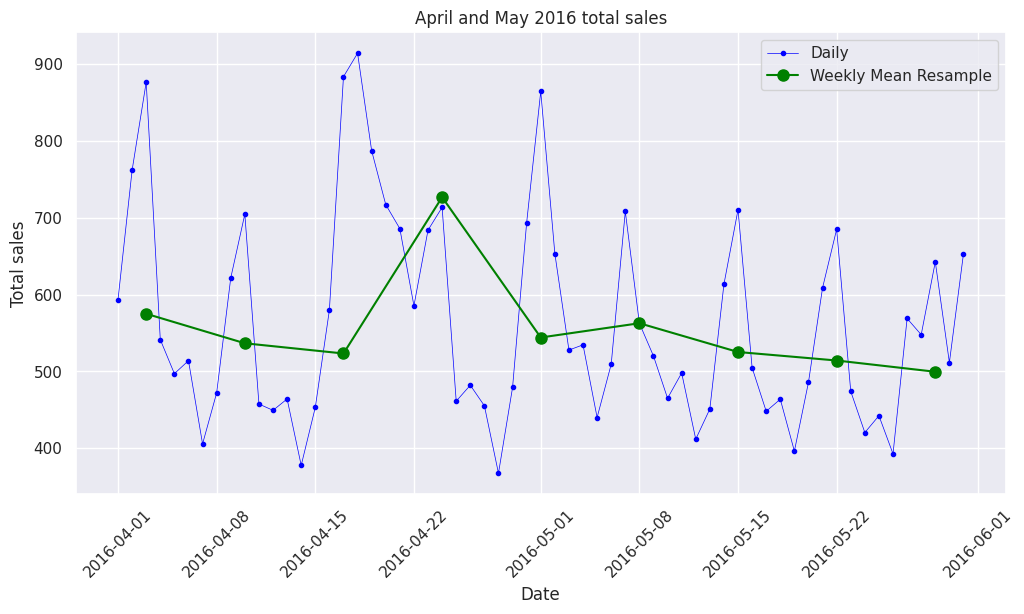

In [48]:
# Sales for April to May 2016.
start, end = '2016-04', '2016-05'

# Analyse before and after the earthquake

fig, ax = plt.subplots(figsize=(12,6))

color_daily = 'blue'
color_weekly = 'green'

ax.plot(sales_daily_mean.loc[start:end], marker='.', linestyle='-', linewidth=0.5, label='Daily', color=color_daily)
ax.plot(sales_weekly_mean.loc[start:end], marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample', color=color_weekly)
ax.set_ylabel("Total sales")
ax.set_xlabel("Date")
ax.tick_params(axis='x', labelrotation=45)
ax.legend()
ax.set_title("April and May 2016 total sales")

In the week of the earthquake (from April 14th to April 21st), sales increased during this week, reaching a peak on the day of the earthquake (16th), but then experienced a sharp decline for nearly two weeks following the earthquake, returning to normalcy.



**4. Are certain groups of stores selling more products? (Cluster, city, state, type)**

In [49]:
# Merge train and stores datasets

train_stores = pd.merge(train, stores)

train_stores.head()

id       date  store_nbr      family  sales  onpromotion   city  \
0 0.00 2013-01-01       1.00  AUTOMOTIVE   0.00         0.00  Quito   
1 1.00 2013-01-01       1.00   BABY CARE   0.00         0.00  Quito   
2 2.00 2013-01-01       1.00      BEAUTY   0.00         0.00  Quito   
3 3.00 2013-01-01       1.00   BEVERAGES   0.00         0.00  Quito   
4 4.00 2013-01-01       1.00       BOOKS   0.00         0.00  Quito   

       state type  cluster  
0  Pichincha    D       13  
1  Pichincha    D       13  
2  Pichincha    D       13  
3  Pichincha    D       13  
4  Pichincha    D       13

**Store sales by cluster**

In [50]:
# Sum of sales by cluster

sales_clusters = train_stores.groupby("cluster", as_index=False)["sales"].sum()
sales_clusters

cluster          sales
0         1  54,376,751.96
1         2  28,916,403.50
2         3  75,628,703.46
3         4  49,443,442.97
4         5  62,087,553.25
5         6 114,254,386.74
6         7  15,478,120.49
7         8 107,928,246.70
8         9  30,561,081.05
9        10  85,324,430.43
10       11 100,614,275.93
11       12  18,030,969.25
12       13  72,102,248.79
13       14 157,430,523.08
14       15  55,296,949.37
15       16  13,259,375.69
16       17  32,911,489.54

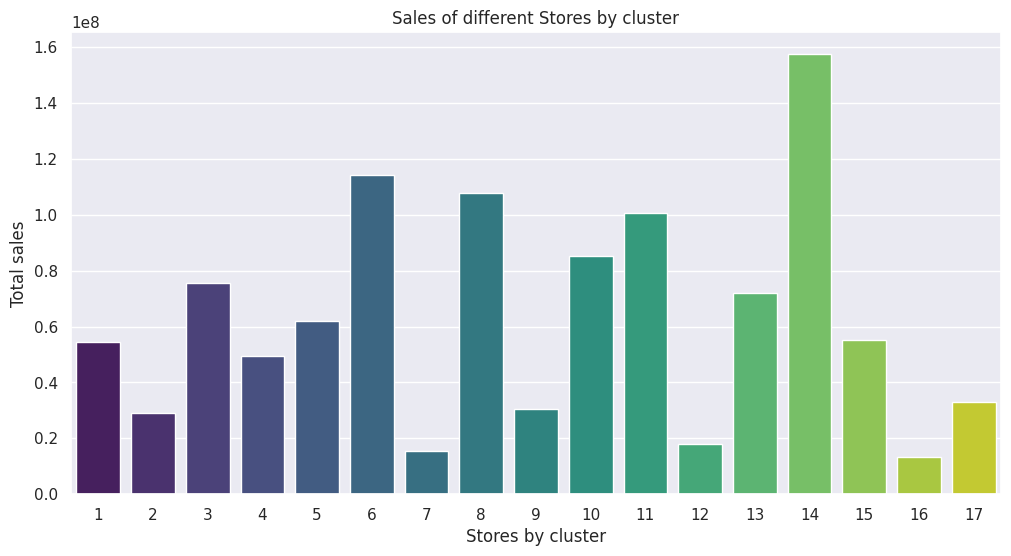

In [51]:
# vertical Bar chart of sales by cluster

ax = sns.barplot(data=sales_clusters, x = "cluster", y = "sales", palette='viridis')
plt.xlabel("Stores by cluster")
plt.ylabel("Total sales")
plt.title("Sales of different Stores by cluster")
plt.show()

cluster 14 has the highest sales. cluster 16 has the lowest sales.

**Store sales by city**

In [52]:
# Sum of sales by city

sales_city = train_stores.groupby("city", as_index=False)["sales"].sum()
sales_city

city          sales
0          Ambato  40,304,401.30
1        Babahoyo  17,746,872.70
2         Cayambe  28,325,558.48
3          Cuenca  49,168,596.03
4           Daule  19,188,021.38
5       El Carmen  11,057,483.12
6      Esmeraldas  16,391,692.21
7        Guaranda  13,049,509.84
8       Guayaquil 122,967,260.48
9          Ibarra  11,451,270.02
10      Latacunga  21,182,263.78
11       Libertad  15,322,431.10
12           Loja  18,859,999.26
13        Machala  33,386,796.54
14          Manta  13,912,337.02
15         Playas   7,676,679.42
16           Puyo   4,090,201.74
17        Quevedo  14,178,501.29
18          Quito 556,741,836.83
19       Riobamba  11,387,918.75
20        Salinas  11,420,997.87
21  Santo Domingo  35,834,323.04

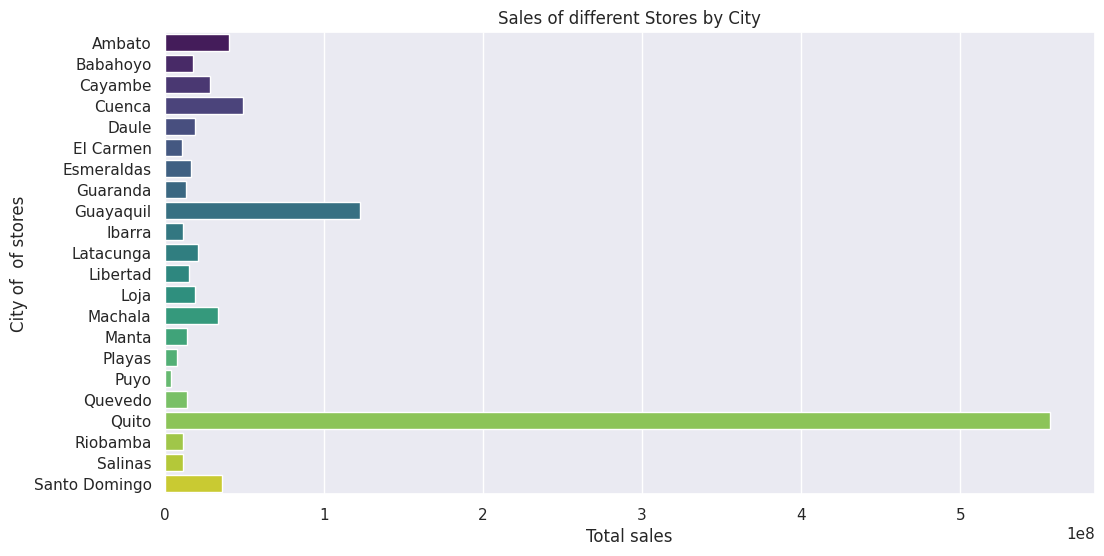

In [53]:
# horizontal Bar chart of sales by city

sns.barplot(data=sales_city, y = "city", x = "sales", palette='viridis')
plt.ylabel("City of  of stores")
plt.xlabel("Total sales")
plt.title("Sales of different Stores by City")
plt.show()

Quito has the highest total sales, as it is the capital, and Puyo the lowest

**Store sales by state**

In [54]:
# Sum of sales by state

sales_state = train_stores.groupby("state", as_index=False)["sales"].sum()
sales_state

state          sales
0                            Azuay  49,168,596.03
1                          Bolivar  13,049,509.84
2                       Chimborazo  11,387,918.75
3                         Cotopaxi  21,182,263.78
4                           El Oro  33,386,796.54
5                       Esmeraldas  16,391,692.21
6                           Guayas 165,154,392.38
7                         Imbabura  11,451,270.02
8                             Loja  18,859,999.26
9                         Los Rios  31,925,373.99
10                          Manabi  24,969,820.13
11                         Pastaza   4,090,201.74
12                       Pichincha 585,067,395.31
13                     Santa Elena  11,420,997.87
14  Santo Domingo de los Tsachilas  35,834,323.04
15                      Tungurahua  40,304,401.30

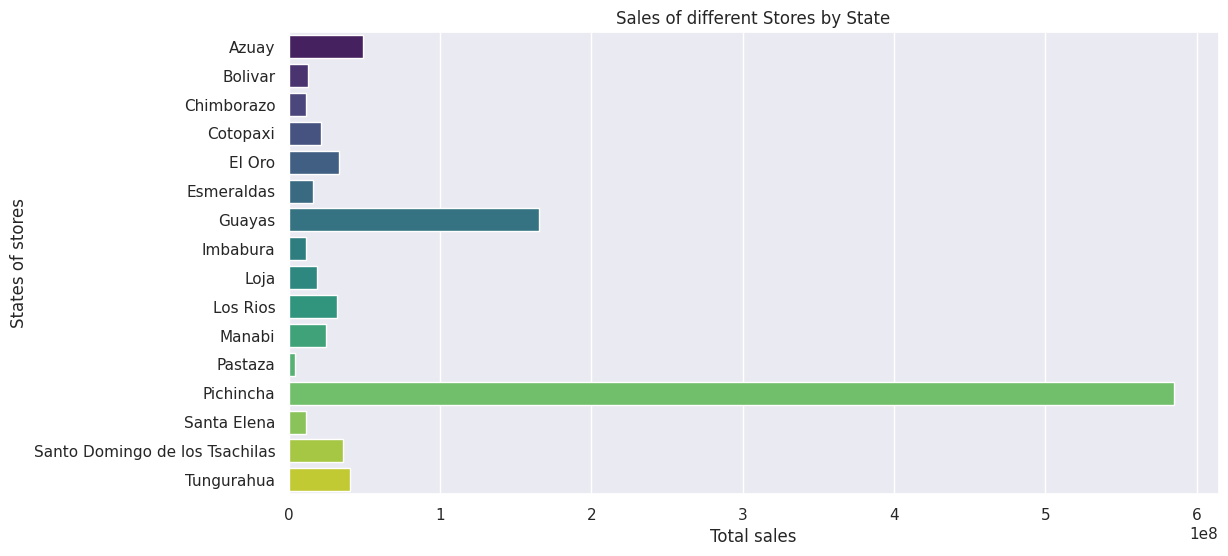

In [55]:
# horizontal Bar chart of sales by state

sns.barplot(data=sales_state, y = "state", x = "sales", palette='viridis')
plt.ylabel("States of stores")
plt.xlabel("Total sales")
plt.title("Sales of different Stores by State")
plt.show()

Pichincha has the highest total sales
Pastaza has the lowest total sales

**Store sales by type**

In [56]:
# Sum of sales by store type

sales_type = train_stores.groupby("type", as_index=False)["sales"].sum()
sales_type

type          sales
0    A 353,043,841.80
1    B 145,260,635.13
2    C 164,434,742.56
3    D 351,083,296.86
4    E  59,822,435.84

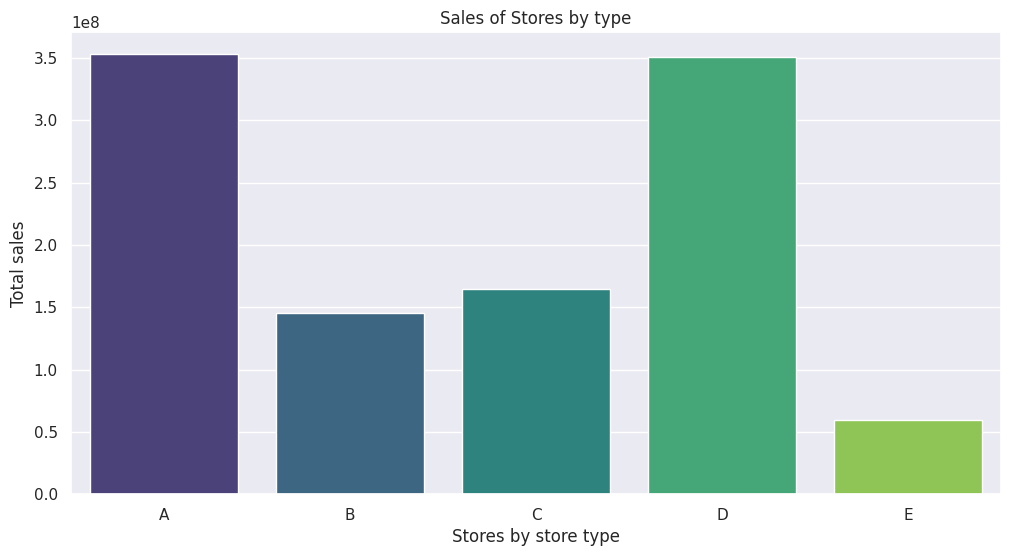

In [57]:
# vertical Bar chart of sales by store type

sns.barplot(data=sales_type, x = "type", y = "sales", palette='viridis')
plt.xlabel("Stores by store type")
plt.ylabel("Total sales")
plt.title("Sales of Stores by type")
plt.show()

type A nd D have the highest total sales

**5. Are sales affected by promotions, oil prices and holidays?**

***Sales and promotions***

In [58]:

# check unique values product family
train['family'].unique()


array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD', nan], dtype=object)

In [59]:
# Filter rows with promotions and sum sales for top 10 families
promotions = train_copy[train_copy["onpromotion"] != 0].groupby("family")["sales"].sum().sort_values(ascending=False).head(10)

# Filter rows without promotions and sum sales for top 10 families
no_promotions = train_copy[train_copy["onpromotion"] == 0].groupby("family")["sales"].sum().sort_values(ascending=False).head(10)

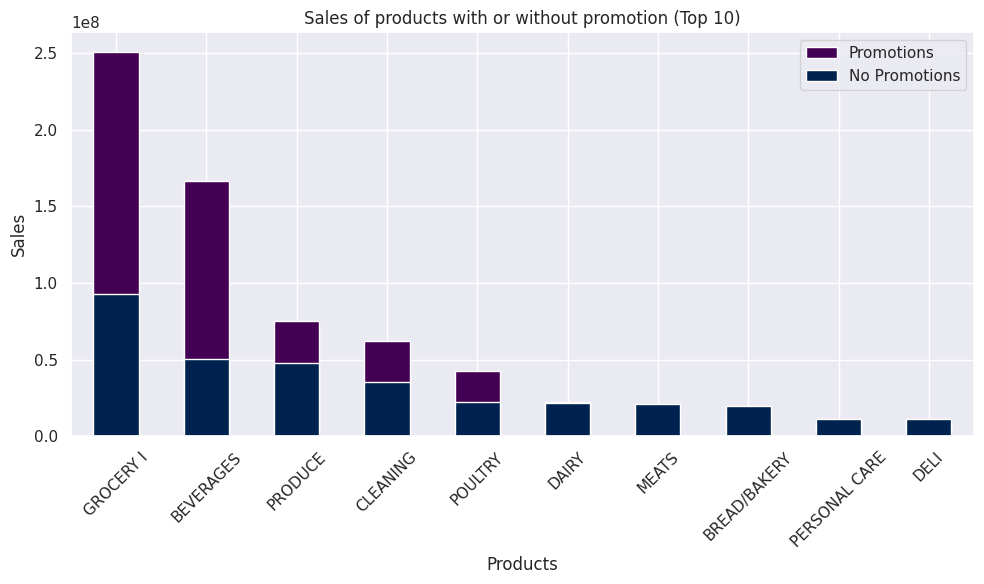

In [60]:
# Create stacked bar chart to visualize sales on and off promotions

ax = promotions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
no_promotions.plot(kind='bar', stacked=True, ax=ax, colormap='cividis')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add legend
plt.legend(["Promotions", "No Promotions"])

# Label the axes and title
plt.ylabel("Sales")
plt.xlabel("Products")
plt.title("Sales of products with or without promotion (Top 10)")

plt.tight_layout()
plt.show()

promotions increases sales for most common purchased items in groceries and beverages category.


***Sales and oil prices***

In [61]:
# merge train and oil dataset

merge = train_copy.merge(
    oil,
    how='left',
    on=['date'])

merge.reset_index()
merge.head()

date   id  store_nbr        family  sales  onpromotion  year  month  \
0 2013-01-01  563         25        BEAUTY   2.00            0  2013      1   
1 2013-01-01  564         25     BEVERAGES 810.00            0  2013      1   
2 2013-01-01  566         25  BREAD/BAKERY 180.59            0  2013      1   
3 2013-01-01  568         25      CLEANING 186.00            0  2013      1   
4 2013-01-01  569         25         DAIRY 143.00            0  2013      1   

   dcoilwtico  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

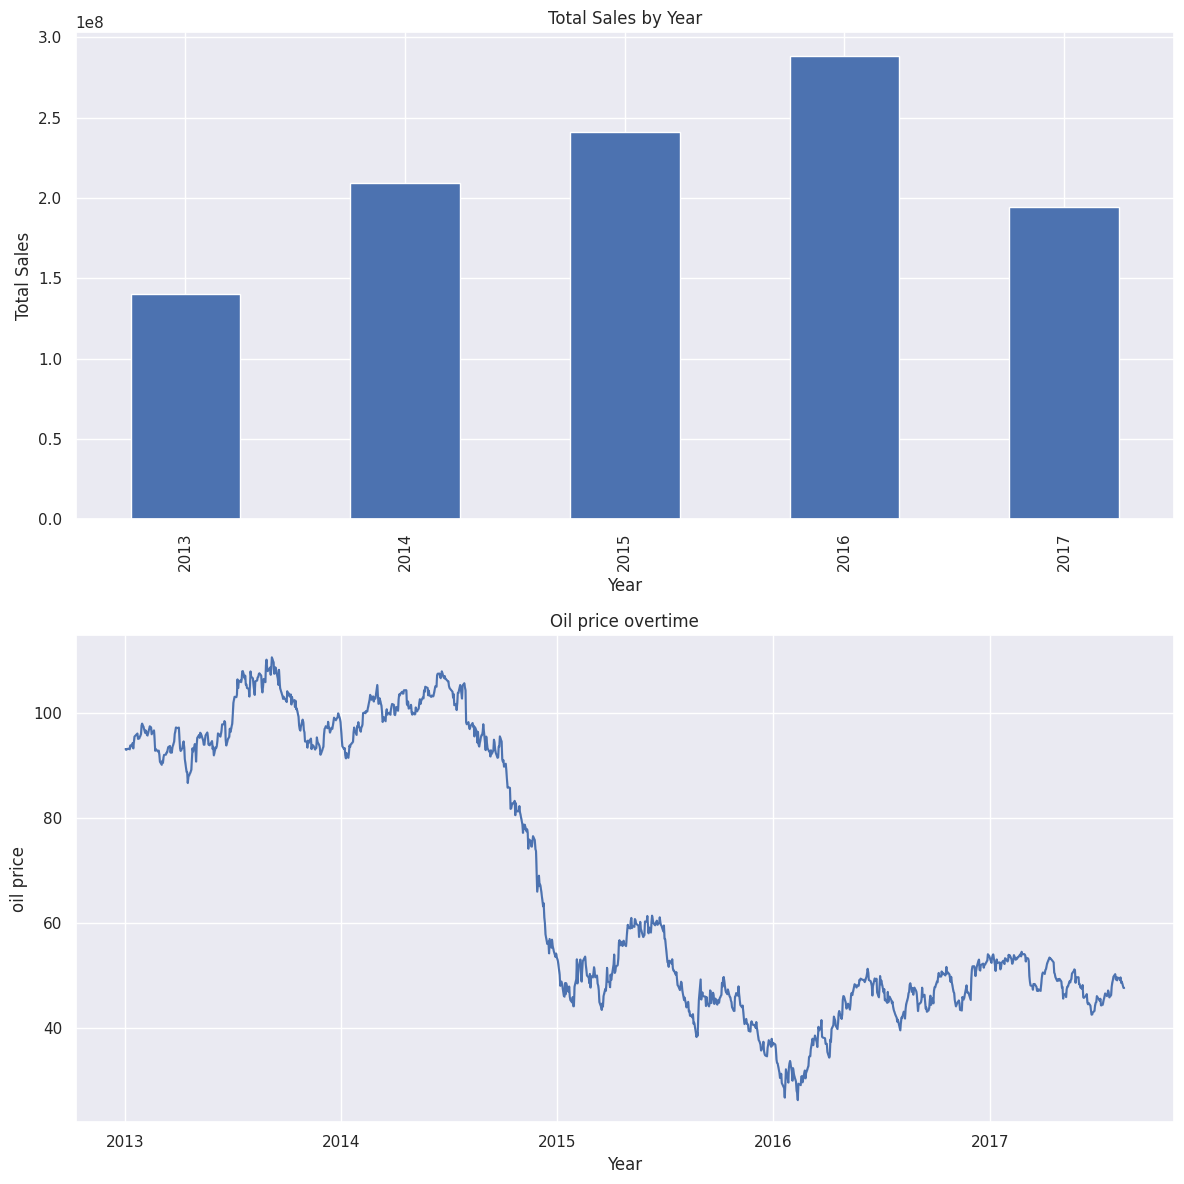

In [62]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot the average sales by year
merge.groupby(['year'])['sales'].sum().plot.bar(ax=ax1, title='Total Sales by Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Sales')

# Plot the oil data overtime
sns.lineplot(data=merge, x='date', y='dcoilwtico', ax=ax2)
ax2.set_title('Oil price overtime')
ax2.set_xlabel('Year')
ax2.set_ylabel('oil price')

plt.tight_layout()
plt.show()


In [63]:
# Determine the correlation between sales and oil prices

correlation = merge['sales'].corr(merge['dcoilwtico'])
print(correlation)

-0.030119956091871628


Very weak and almost negligible negative correlation between sales and oil prices over time
Other factors are likely more influential in determining sales than oil prices

***Sales and holidays***

In [64]:
# unique values in holidays column

holidays['type'].value_counts()

type
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: count, dtype: int64

In [65]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [66]:
# merge train and holidays dataset

merge_2 = train_copy.merge(
    holidays,
    how='left',
    on=['date'])

merge_2.reset_index()
merge_2.head()

date   id  store_nbr        family  sales  onpromotion  year  month  \
0 2013-01-01  563         25        BEAUTY   2.00            0  2013      1   
1 2013-01-01  564         25     BEVERAGES 810.00            0  2013      1   
2 2013-01-01  566         25  BREAD/BAKERY 180.59            0  2013      1   
3 2013-01-01  568         25      CLEANING 186.00            0  2013      1   
4 2013-01-01  569         25         DAIRY 143.00            0  2013      1   

      type    locale locale_name         description transferred  
0  Holiday  National     Ecuador  Primer dia del ano       False  
1  Holiday  National     Ecuador  Primer dia del ano       False  
2  Holiday  National     Ecuador  Primer dia del ano       False  
3  Holiday  National     Ecuador  Primer dia del ano       False  
4  Holiday  National     Ecuador  Primer dia del ano       False

In [67]:
merge_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100607 entries, 0 to 2100606
Data columns (total 13 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   id           int64         
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   year         int32         
 7   month        int32         
 8   type         object        
 9   locale       object        
 10  locale_name  object        
 11  description  object        
 12  transferred  object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(3), object(6)
memory usage: 192.3+ MB


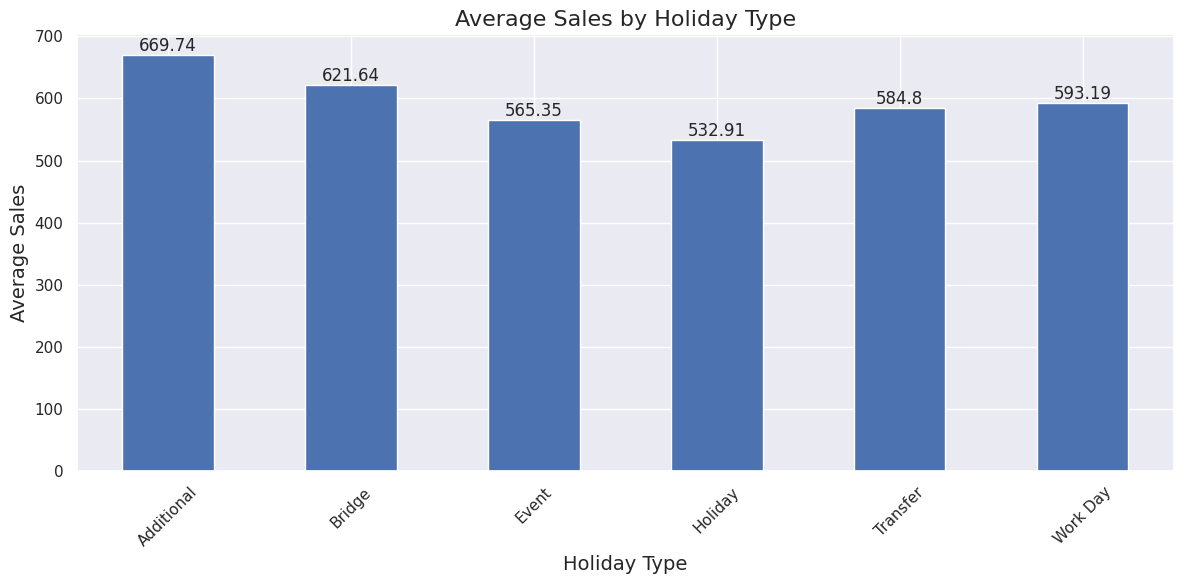

In [68]:
# Group the data by holiday type and calculate the average sales for each type
avg_sales_by_type = merge_2.groupby("type").agg({"sales": "mean"})

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot a bar chart of the average sales by holiday type
avg_sales_by_type.plot(kind="bar", y="sales", ax=ax, legend=False)

# Add labels to the bars
for index, value in enumerate(avg_sales_by_type["sales"]):
    plt.text(index, value, str(round(value, 2)), ha='center', va='bottom', fontsize=12)

# Add a title and labels
ax.set_title("Average Sales by Holiday Type", fontsize=16)
ax.set_xlabel("Holiday Type", fontsize=14)
ax.set_ylabel("Average Sales", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Additional holidays have the highest average sales. However, holiday type barely has an effect on sales

**6. What analysis can we get from the date and its extractable features?**

In [69]:
# Function to extract features from date column

def getDateFeatures(df, date):
    df['date'] = pd.to_datetime(df[date])
    df['month'] = df['date'].dt.month
    df['Month'] = df['date'].dt.month_name()
    df['Day'] = df['date'].dt.day_name()
    df['day_of_month'] = df['date'].dt.day
    df['day_of_year'] = df['date'].dt.dayofyear
    df['week_of_year'] = df['date'].dt.isocalendar().week
    df['day_of_week'] = df['date'].dt.dayofweek
    df['year'] = df['date'].dt.year
    df["is_weekend"] = np.where(df['day_of_week'] > 4, 1, 0)
    df['quarter'] = df['date'].dt.quarter
    return df

In [70]:
# run our train data through our function

train_copy = train_copy.reset_index()
train_data = getDateFeatures(train_copy, "date")
train_data.head()

date   id  store_nbr        family  sales  onpromotion  year  month  \
0 2013-01-01  563         25        BEAUTY   2.00            0  2013      1   
1 2013-01-01  564         25     BEVERAGES 810.00            0  2013      1   
2 2013-01-01  566         25  BREAD/BAKERY 180.59            0  2013      1   
3 2013-01-01  568         25      CLEANING 186.00            0  2013      1   
4 2013-01-01  569         25         DAIRY 143.00            0  2013      1   

     Month      Day  day_of_month  day_of_year  week_of_year  day_of_week  \
0  January  Tuesday             1            1             1            1   
1  January  Tuesday             1            1             1            1   
2  January  Tuesday             1            1             1            1   
3  January  Tuesday             1            1             1            1   
4  January  Tuesday             1            1             1            1   

   is_weekend  quarter  
0           0        1  
1           0        1  
2           0        1  
3           0        1  
4           0        1

***Sales on Pay Day (Semi-Monthly)***

In [71]:
# list with semi monthly pay day range (15th and last day 30/31st of the month)

pay_day = pd.date_range(start=train_data.date.min(), end=train_data.date.max(), freq='SM').astype('str').tolist()

In [72]:
# create payday column

train_data["pay_day"] = np.where(train_data["date"].isin(pay_day), 1, 0)
train_data['pay_day'].value_counts()

pay_day
0    1925095
1     136663
Name: count, dtype: int64

We will get the average sales to see wether there is a difference in payday sales and other sales

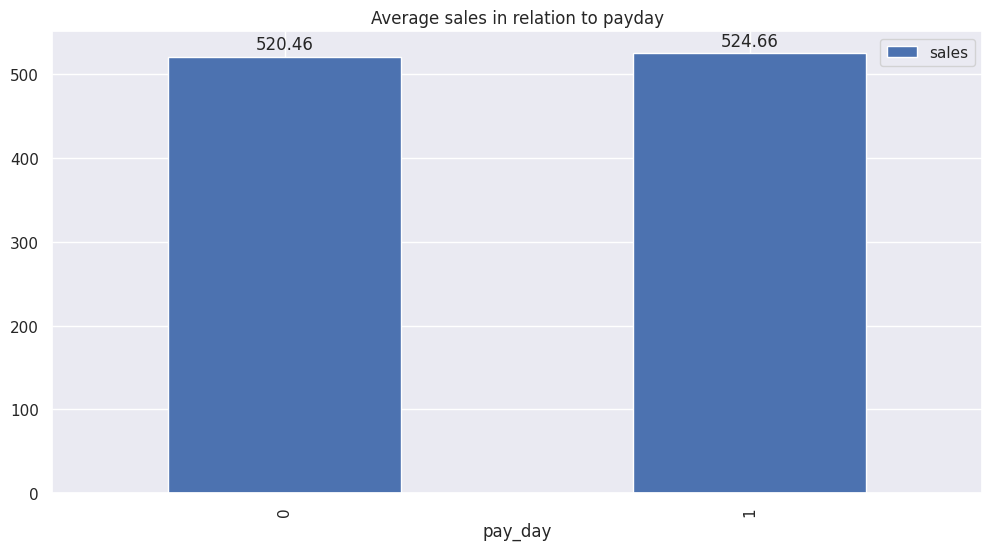

In [73]:
# Plot the average sales in relation to payday

ax = train_data.groupby(["pay_day"], as_index=False)['sales'].mean()\
                                    .plot("pay_day", "sales", kind="bar", figsize=(12,6),
                                         title="Average sales in relation to payday")

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')


Average payday sales are slightly higher than non-payday sales

***Sales by day of the month***

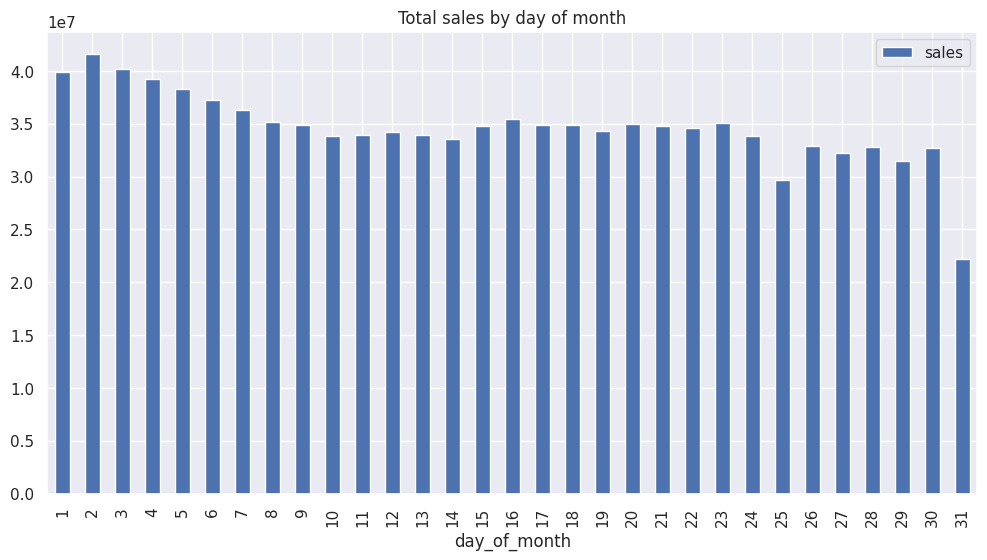

In [74]:
# plot the sum of sales by day of the month
# which day of the month has the most sales?

ax = train_data.groupby(["day_of_month"], as_index=False)["sales"].sum()\
                                    .plot("day_of_month", "sales", kind="bar", figsize=(12,6),
                                         title="Total sales by day of month")

Beginning of the month has high sales (1st - 3rd), with a gradual decline afterwards, but there is an overall uniform trend.

***Sales by week of the year***

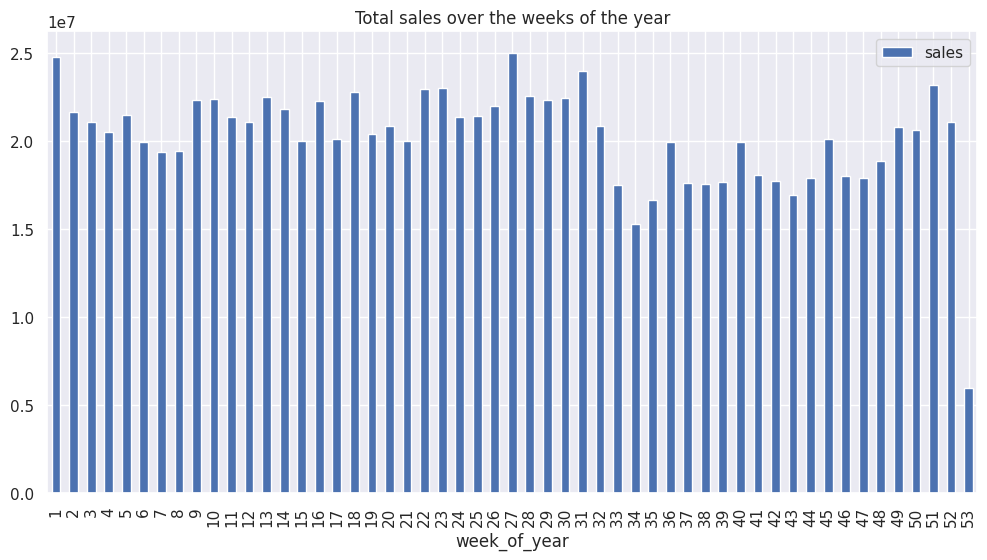

In [75]:
# plot the sum of sales by the weeks of the year

sales_by_week = train_data.groupby(["week_of_year"], as_index=False)['sales'].sum()

ax = sales_by_week.plot("week_of_year", "sales", kind="bar", figsize=(12, 6),
                         title="Total sales over the weeks of the year")

First week and mid year (week 27) have the highest sales

***Sales by month***

In [76]:
# group the sum of sales by month of the year
# which month has the highest sales?

purchase_month = train_data.groupby("Month", as_index=False)["sales"].sum().sort_values(by="sales", ascending=False)
purchase_month = purchase_month.reset_index(drop=True)
purchase_month

Month          sales
0        July 103,363,060.69
1       March  97,228,487.15
2    December  97,027,840.76
3        June  94,516,703.29
4     January  94,442,152.32
5         May  94,399,137.02
6       April  90,668,117.56
7      August  83,472,376.84
8    February  80,637,229.44
9    November  80,335,788.06
10    October  80,080,379.16
11  September  77,473,679.92

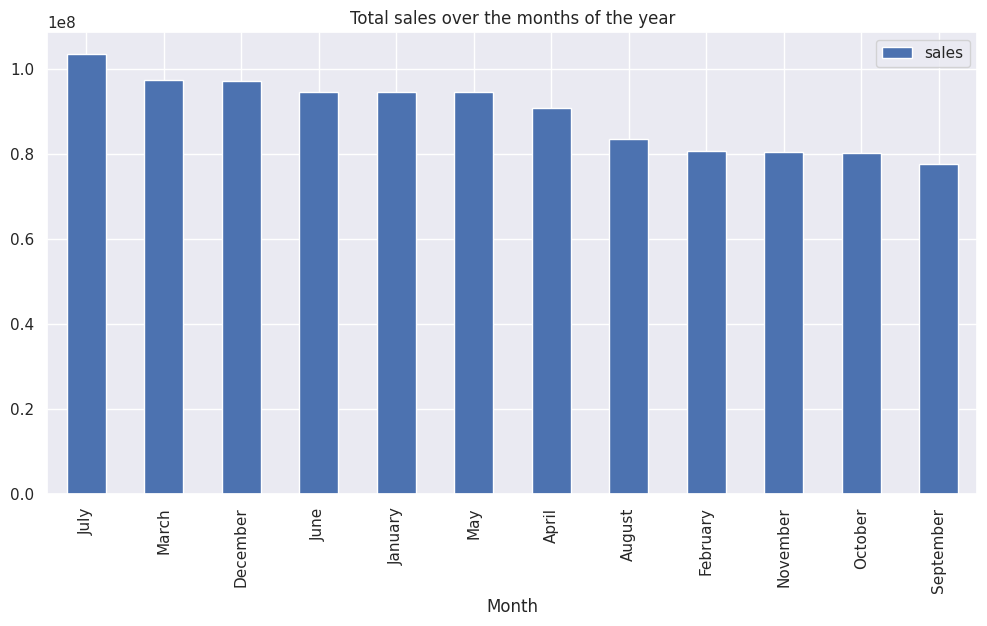

In [77]:
# plot the sum of sales by month of the year

ax = purchase_month.plot("Month", "sales", kind="bar", figsize=(12, 6),
                         title="Total sales over the months of the year")

July(Summer) has the highest sales, followed by march (probaly easter), and december

***Sales by Day of the week***

In [78]:
# group the sum of sales by day of the week
# which day has the highest sales?

purchase_day = train_data.groupby("Day", as_index=False)["sales"].sum().sort_values(by="sales", ascending=False)
purchase_day = purchase_day.reset_index(drop=True)
purchase_day

Day          sales
0     Sunday 198,052,349.18
1   Saturday 186,101,548.14
2     Monday 148,827,793.85
3  Wednesday 142,378,692.83
4     Friday 139,097,846.66
5    Tuesday 137,922,113.28
6   Thursday 121,264,608.27

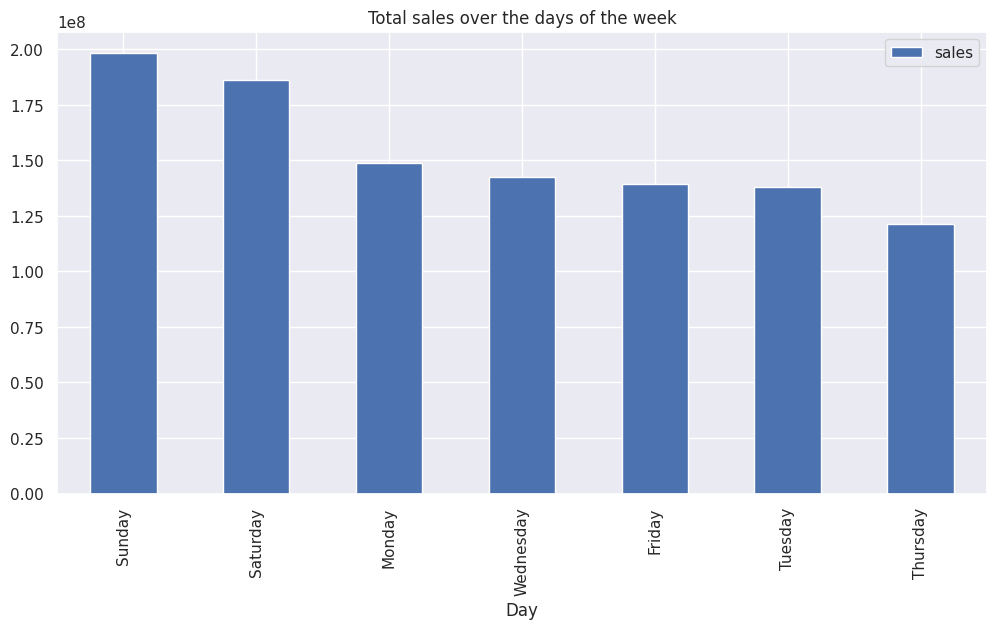

In [79]:
# plot the sum of sales by day of the week

ax = purchase_day.plot("Day", "sales", kind="bar", figsize=(12, 6),
                         title="Total sales over the days of the week")

Sunday and saturday (weekends) have the highest sales

***Sales by season***

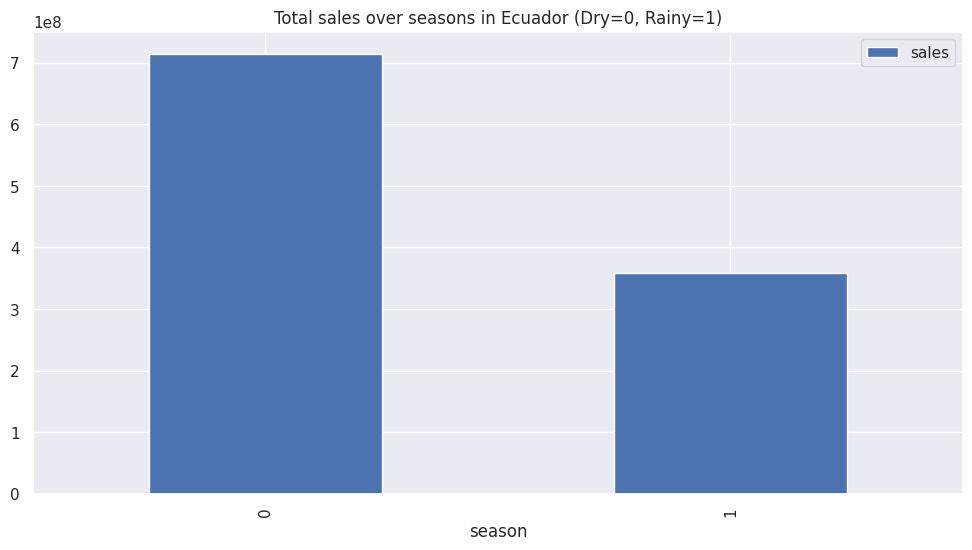

In [80]:
# create column for rainy and dry season

train_data["season"] = np.where(train_data["month"].isin([6,7,8,9]), 1, 0)

# plot sum of sales by season of the year (Dry or Rainy)
sales_by_season = train_data.groupby(["season"], as_index=False)['sales'].sum()

ax = sales_by_season.plot("season", "sales", kind="bar", figsize=(12, 6),
                          title="Total sales over seasons in Ecuador (Dry=0, Rainy=1)")


Tropical countries like Ecuador have 2 seasons (Dry and rainy)
Dry season has higher sales compared to rainy season

***Sales by quarter***

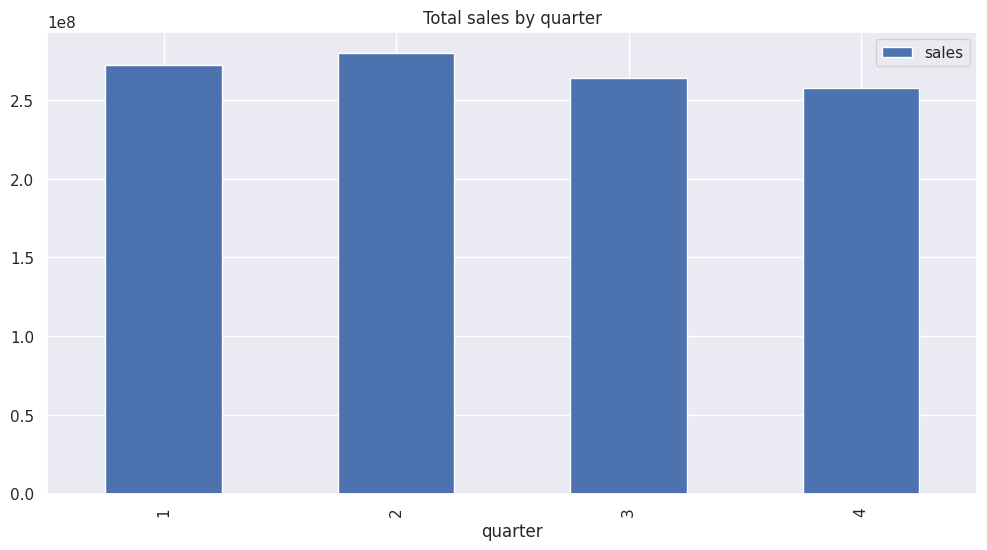

In [81]:
# plot the sum of sales by quarter of the year

sales_by_quarter = train_data.groupby(["quarter"], as_index=False)['sales'].sum()

ax = sales_by_quarter.plot("quarter", "sales", kind="bar", figsize=(12, 6),
                          title="Total sales by quarter")

**7. What is the difference between RMSLE, RMSE, MSE (or why is the MAE greater than all of them?)**

MSE( Mean Squared Error) is a widely used metric for regression problems. It measures the average of the squared differences between predicted and actual values. MSE is sensitive to outliers because it squares the differences.

RMSE (Root Mean Squared Error) is the square root of the MSE. It's often used because it has the same unit of measurement as the target variable, which makes it more interpretable. RMSE treats all errors equally.

RMSLE (Root Mean Squared Logarithmic Error) is commonly used when you want to penalize underpredictions more than overpredictions and when the target variable has a wide range. It first takes the natural logarithm of the predicted and actual values and then computes the RMSE of those log values. RMSLE takes the logarithm of the values before computing the error, which can be useful when dealing with skewed data or when you want to give less weight to large errors for large values

MSE is greater because it is calculated as the average of the squared differences between predicted and actual values. When you square the differences between predicted and actual values, even small errors get larger because negative differences (i.e., underpredictions) become positive. Large errors, in particular, contribute significantly to the MSE

**Hypothesis testing**

**Null Hypothesis (H0):** "There is no significant relationship between store sales and promotions."

**Alternative Hypothesis (Ha):** "There is a significant relationship between store sales and churn promotions."

In [82]:
# encode categorical features

train_copy['onpromotion_encoded'] = np.where(train_copy['onpromotion'] >= 1, 1, 0)
train_copy['onpromotion_encoded'].value_counts()

onpromotion_encoded
0    1450446
1     611312
Name: count, dtype: int64

**T-test**

The t-test is a statistical hypothesis test that assesses whether the means of two groups are significantly different from each other (an independent two-sample t-test)

In [83]:
# Extract the sales of products when they are on promotion and when they are not
sales_on_promotion = train_copy[train_copy['onpromotion_encoded'] == 1]['sales']
sales_not_on_promotion = train_copy[train_copy['onpromotion_encoded'] == 0]['sales']

# Calculate the sample sizes
n1 = len(sales_on_promotion)
n2 = len(sales_not_on_promotion)

# Calculate the degrees of freedom
degrees_of_freedom = n1 + n2 - 2  # Assuming equal variances, subtract 2 for two samples

# Set the significance level
alpha = 0.05

# Calculate the critical t-values for a two-tailed test
critical_t_value = t.ppf(1 - alpha / 2, degrees_of_freedom)

# Perform an independent two-sample t-test
t_stat, p_value = ttest_ind(sales_on_promotion, sales_not_on_promotion)

# Print the t-statistic, p-value, degrees of freedom, and critical t-values
print("t-statistic:", t_stat)
print("p-value:", p_value)
print("Degrees of Freedom:", degrees_of_freedom)
print(f"Critical t-value (α = {alpha/2}):", -critical_t_value)  # Left tail
print(f"Critical t-value (α = {alpha/2}):", critical_t_value)   # Right tail

# Check if the absolute t-statistic falls within the critical value range
if t_stat >= -critical_t_value and t_stat <= critical_t_value:
    print("\nThe absolute t-statistic falls within the critical value range.")
else:
    print("\nThe absolute t-statistic does not fall within the critical value range.")


t-statistic: 466.1532931598274
p-value: 0.0
Degrees of Freedom: 2061756
Critical t-value (α = 0.025): -1.9599651351478848
Critical t-value (α = 0.025): 1.9599651351478848

The absolute t-statistic does not fall within the critical value range.


There is a statistically significant difference in sales between products when they are on promotion and when they are not on promotion (p-value < 0.05) and the t-statistic does not fall within the critical value range
We have strong evidence to reject the null hypothesis!!

***Chi-Squared contingency test***

The chi-squared statistic measures the strength of the association or dependence between the two categorical variables

In [84]:
# Create contingency table
contingency_table = pd.crosstab(train_copy['onpromotion_encoded'], train_copy['sales'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-squared statistic: ", chi2)
print("p-value: ", p)

Chi-squared statistic:  853431.6902295031
p-value:  0.0


This indicates a strong association between the onpromotion and sales.

# 3. Data Preparation

***Data Issues***

Deal with missing vales after merging, creating new features and adding missing dates
Rename a few columns to be more readable
Ensure dtypes are correct for each column

In [85]:
# shape overview to doubleckeck

train.shape, test.shape

((3000892, 6), (28512, 5))

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000892 entries, 0 to 3
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           float64       
 1   date         datetime64[ns]
 2   store_nbr    float64       
 3   family       object        
 4   sales        float64       
 5   onpromotion  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 224.8+ MB


Our test data is without the target variable, which is ok

In [87]:
# check for duplicates

train.duplicated().any(),
stores.duplicated().any(),
oil.duplicated().any(),
test.duplicated().any(),
holidays.duplicated().any(),
transactions.duplicated().any()

False

In [88]:
# check for missing values in train data
# we know our test data doesn't have any missing values

train.isna().sum()

id             4
date           0
store_nbr      4
family         4
sales          4
onpromotion    4
dtype: int64

we have some missing values, since we added missing dates

In [89]:
null_rows = train[train['id'].isnull()]
null_rows

id       date  store_nbr family  sales  onpromotion
0 NaN 2013-12-25        NaN    NaN    NaN          NaN
1 NaN 2014-12-25        NaN    NaN    NaN          NaN
2 NaN 2015-12-25        NaN    NaN    NaN          NaN
3 NaN 2016-12-25        NaN    NaN    NaN          NaN

In [90]:
train.tail()

id       date  store_nbr   family  sales  onpromotion
3000887 3,000,887.00 2017-08-15       9.00  SEAFOOD  16.00         0.00
0                NaN 2013-12-25        NaN      NaN    NaN          NaN
1                NaN 2014-12-25        NaN      NaN    NaN          NaN
2                NaN 2015-12-25        NaN      NaN    NaN          NaN
3                NaN 2016-12-25        NaN      NaN    NaN          NaN

In [91]:
# replace null values in id column

train.loc[train['date'] == '2013-12-25', 'id'] = 3000888
train.loc[train['date'] == '2014-12-25', 'id'] = 3000889
train.loc[train['date'] == '2015-12-25', 'id'] = 3000890
train.loc[train['date'] == '2016-12-25', 'id'] = 3000891

In [92]:
cols = ["store_nbr", "sales", "onpromotion"]

# Fill null values in numerical columns with 0
train[cols] = train[cols].fillna(0)

# Fill null values in family column
train['family'] = train['family'].fillna('none')

In [93]:
train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [94]:
# we had some missing values in the oil dataset

oil['dcoilwtico'].isna().sum()

43

In [95]:
#Filling missing values in oil data with the the value before that missing data

oil= oil.bfill()

In [96]:
# check again to confirm

oil['dcoilwtico'].isna().sum()

0

***Preparing Train Data***

In [97]:
# Merge train and stores datasets
df_train1 = pd.merge(train, stores, on="store_nbr")

# Merge df_train1 with oil_df and holidays_df
merged_train = pd.merge(df_train1, oil, on="date", how="left")
merged_train = pd.merge(merged_train, holidays, on="date", how="left")

merged_train.head()

id       date  store_nbr      family  sales  onpromotion   city  \
0 0.00 2013-01-01       1.00  AUTOMOTIVE   0.00         0.00  Quito   
1 1.00 2013-01-01       1.00   BABY CARE   0.00         0.00  Quito   
2 2.00 2013-01-01       1.00      BEAUTY   0.00         0.00  Quito   
3 3.00 2013-01-01       1.00   BEVERAGES   0.00         0.00  Quito   
4 4.00 2013-01-01       1.00       BOOKS   0.00         0.00  Quito   

       state type_x  cluster  dcoilwtico   type_y    locale locale_name  \
0  Pichincha      D       13       93.14  Holiday  National     Ecuador   
1  Pichincha      D       13       93.14  Holiday  National     Ecuador   
2  Pichincha      D       13       93.14  Holiday  National     Ecuador   
3  Pichincha      D       13       93.14  Holiday  National     Ecuador   
4  Pichincha      D       13       93.14  Holiday  National     Ecuador   

          description transferred  
0  Primer dia del ano       False  
1  Primer dia del ano       False  
2  Primer dia del ano       False  
3  Primer dia del ano       False  
4  Primer dia del ano       False

In [98]:
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 16 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           float64       
 1   date         datetime64[ns]
 2   store_nbr    float64       
 3   family       object        
 4   sales        float64       
 5   onpromotion  float64       
 6   city         object        
 7   state        object        
 8   type_x       object        
 9   cluster      int64         
 10  dcoilwtico   float64       
 11  type_y       object        
 12  locale       object        
 13  locale_name  object        
 14  description  object        
 15  transferred  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(9)
memory usage: 372.8+ MB


In [99]:
# drop categorical columns not relevant to analysis

merged_train= merged_train.drop(columns=["state", "type_x", "city", "locale", "locale_name", "description", "transferred"])
merged_train.head()

id       date  store_nbr      family  sales  onpromotion  cluster  \
0 0.00 2013-01-01       1.00  AUTOMOTIVE   0.00         0.00       13   
1 1.00 2013-01-01       1.00   BABY CARE   0.00         0.00       13   
2 2.00 2013-01-01       1.00      BEAUTY   0.00         0.00       13   
3 3.00 2013-01-01       1.00   BEVERAGES   0.00         0.00       13   
4 4.00 2013-01-01       1.00       BOOKS   0.00         0.00       13   

   dcoilwtico   type_y  
0       93.14  Holiday  
1       93.14  Holiday  
2       93.14  Holiday  
3       93.14  Holiday  
4       93.14  Holiday

In [100]:
# remane columnswith relevant names

merged_train.rename(columns = {"cluster":"store_cluster", "dcoilwtico":"oil_price", "type_y":"events"}, inplace=True)


In [101]:
# check unique values in events column

merged_train["events"].unique()

array(['Holiday', nan, 'Work Day', 'Additional', 'Event', 'Transfer',
       'Bridge'], dtype=object)

In [102]:
# Rename values in events column

merged_train["events"].replace(to_replace={"Bridge", "Event", "Additional"}, value="Holiday", inplace=True)
merged_train["events"].replace(to_replace={"Work Day", "Transfer"}, value="No holiday", inplace=True)

In [103]:
# check for null values

merged_train["events"].isna().sum()

2551824

In [104]:
# Fill missing values with 'no holiday'

merged_train["events"].fillna("No holiday", inplace=True)

# Replace 'holidays' with 1 and other events with 0

merged_train['events'] = merged_train['events'].replace('Holiday', 1).replace('No holiday', 0)

In [105]:
# check unique values

merged_train["events"].unique()

array([1, 0])

In [106]:
# reclassification of product family to reduce number of categorical variables to encode

merged_train["family"].replace(to_replace={"GROCERY I", "GROCERY II", "EGGS", "PRODUCE", "DAIRY", "BREAD/BAKERY", "DELI", "PREPARED FOODS"}, value="GROCERY", inplace=True)
merged_train["family"].replace(to_replace={"HOME AND KITCHEN I", "HOME AND KITCHEN II", "HOME APPLIANCES", "HARDWARE", "PLAYERS AND ELECTRONICS"}, value="HOME AND KITCHEN", inplace=True)
merged_train["family"].replace(to_replace={"MEATS", "POULTRY", "SEAFOOD"}, value="FROZEN FOODS", inplace=True)
merged_train["family"].replace(to_replace={"HOME CARE", "LAWN AND GARDEN", "CLEANING"}, value="HOME CARE AND GARDEN", inplace=True)
merged_train["family"].replace(to_replace={"BEAUTY", "BABY CARE", "LADIESWEAR", "LINGERIE", "PERSONAL CARE"}, value="BEAUTY AND FASHION", inplace=True)
merged_train["family"].replace(to_replace={"LIQUOR,WINE,BEER", "BEVERAGES"}, value="BEVERAGES AND LIQUOR", inplace=True)
merged_train["family"].replace(to_replace={"MAGAZINES", "BOOKS", "CELEBRATION"}, value="SCHOOL AND OFFICE SUPPLIES", inplace=True)


In [107]:
# check unique values

merged_train["family"].unique()

array(['AUTOMOTIVE', 'BEAUTY AND FASHION', 'BEVERAGES AND LIQUOR',
       'SCHOOL AND OFFICE SUPPLIES', 'GROCERY', 'HOME CARE AND GARDEN',
       'FROZEN FOODS', 'HOME AND KITCHEN', 'PET SUPPLIES'], dtype=object)

In [108]:
# Check for missing values

merged_train.isna().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
store_cluster         0
oil_price        878526
events                0
dtype: int64

In [109]:
# filling missing values

merged_train["oil_price"].fillna(method="bfill", inplace=True)

In [110]:
# check cols and rows

merged_train.shape

(3054348, 9)

In [111]:
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   id             float64       
 1   date           datetime64[ns]
 2   store_nbr      float64       
 3   family         object        
 4   sales          float64       
 5   onpromotion    float64       
 6   store_cluster  int64         
 7   oil_price      float64       
 8   events         int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 209.7+ MB


***Feature Engineering***

In [112]:
# Create new features

merged_train["Year"] = merged_train['date'].dt.year
merged_train["Month"] = merged_train['date'].dt.month
merged_train['Day'] = merged_train['date'].dt.day
merged_train['quarter'] = merged_train['date'].dt.quarter
merged_train['week_of_year'] = merged_train['date'].dt.isocalendar().week
merged_train['day_of_week'] = merged_train['date'].dt.dayofweek
merged_train["is_weekend"] = np.where(merged_train['day_of_week'] > 4, 1, 0)

In [113]:
merged_train['week_of_year'] = merged_train['week_of_year'].astype(int)

In [114]:
merged_train.tail()

id       date  store_nbr                      family  \
3054343 3,000,883.00 2017-08-15       9.00                FROZEN FOODS   
3054344 3,000,884.00 2017-08-15       9.00                     GROCERY   
3054345 3,000,885.00 2017-08-15       9.00                     GROCERY   
3054346 3,000,886.00 2017-08-15       9.00  SCHOOL AND OFFICE SUPPLIES   
3054347 3,000,887.00 2017-08-15       9.00                FROZEN FOODS   

           sales  onpromotion  store_cluster  oil_price  events  Year  Month  \
3054343   438.13         0.00              6      47.57       1  2017      8   
3054344   154.55         1.00              6      47.57       1  2017      8   
3054345 2,419.73       148.00              6      47.57       1  2017      8   
3054346   121.00         8.00              6      47.57       1  2017      8   
3054347    16.00         0.00              6      47.57       1  2017      8   

         Day  quarter  week_of_year  day_of_week  is_weekend  
3054343   15        3            33            1           0  
3054344   15        3            33            1           0  
3054345   15        3            33            1           0  
3054346   15        3            33            1           0  
3054347   15        3            33            1           0

In [115]:
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 16 columns):
 #   Column         Dtype         
---  ------         -----         
 0   id             float64       
 1   date           datetime64[ns]
 2   store_nbr      float64       
 3   family         object        
 4   sales          float64       
 5   onpromotion    float64       
 6   store_cluster  int64         
 7   oil_price      float64       
 8   events         int64         
 9   Year           int32         
 10  Month          int32         
 11  Day            int32         
 12  quarter        int32         
 13  week_of_year   int64         
 14  day_of_week    int32         
 15  is_weekend     int64         
dtypes: datetime64[ns](1), float64(5), int32(5), int64(4), object(1)
memory usage: 314.6+ MB


In [117]:
# Create the directory if it doesn't exist
# import os

# os.makedirs('Data Tables')

# Now save the DataFrame to CSV
merged_train.to_csv('Data Tables/merged_train_data.csv', index=False)

In [118]:
csv_filename = 'Data Tables/merged_train_data.csv'
zip_filename = 'Data Tables/merged_train_data.zip'

# Create a ZIP archive and add the CSV file to it
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(csv_filename)

***Resampling***

In [119]:
# resample data to monthly frequency and compute the mean of sales for each month
cols = ['date', 'sales']

merged_monthly_mean = merged_train[cols].set_index('date').resample('M').mean()
print(merged_monthly_mean.shape)
merged_monthly_mean.tail(3)

(56, 1)


sales
date             
2017-06-30 488.71
2017-07-31 489.91
2017-08-31 465.14

***Stationarity Test***

A time series has to have some statistical properties to be able to stationary:

**Constant mean:** There is no trend over time.
Constant variance, covariance: The scale of the data doesn’t change and the relationship between observations is consistent.

**No seasonality:** Statistical properties of seasonal data changes regularly. Therefore, there is a pattern of change in the mean.

In [120]:
fig = px.line(merged_monthly_mean, x=merged_monthly_mean.index, y='sales', title='Mean of Monthly Sales')
fig.update_xaxes(rangeslider_visible=True)

fig.show()

Ho (Null Hypothesis): The time series data is non-stationary
H1 (alternate Hypothesis): The time series data is stationary

***KPSS Test***

In [121]:
stats, p, lags, critical_values=kpss(merged_train['sales'], 'ct')

print(f'Test_statistics: {stats}')
print(f'p-value: {p}')
print(f'Critical values: {critical_values}')

if p < 0.05 :
    print('Series is not stationary')
else :
    print('Series is stationary')

Test_statistics: 1.144715590990896
p-value: 0.01
Critical values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is not stationary


<ipython-input-121-06311b1c8558>:1: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




***Decomposing***

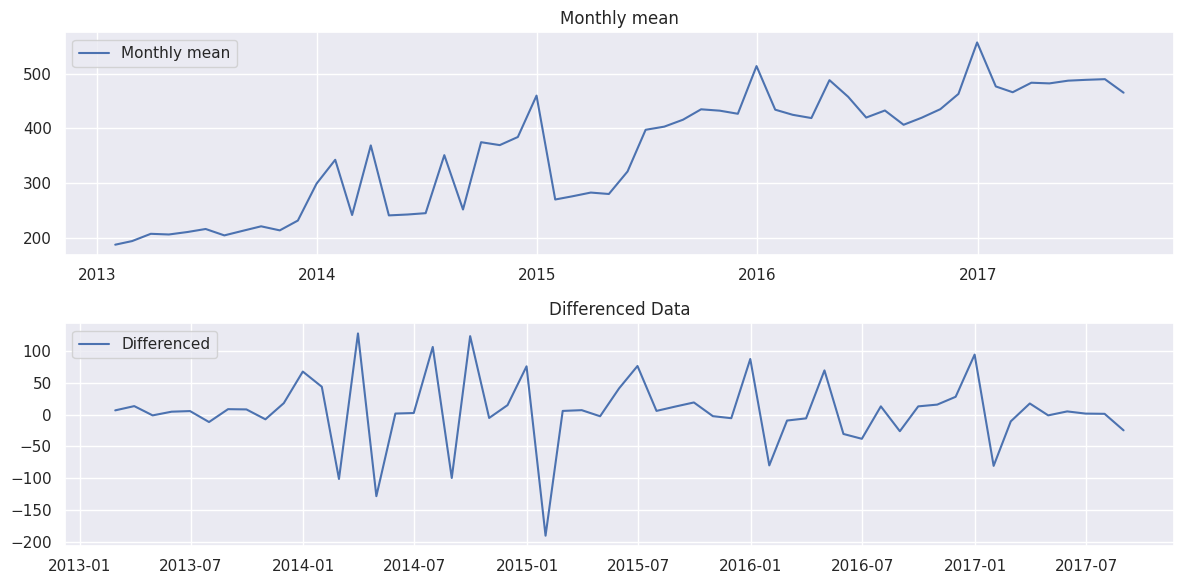

In [122]:
# first-order differencing on the target variable
differenced_data = merged_monthly_mean - merged_monthly_mean.shift(1)

# Plot the original and differenced time series
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(merged_monthly_mean, label='Monthly mean')
plt.legend(loc='upper left')
plt.title('Monthly mean')

plt.subplot(212)
plt.plot(differenced_data, label='Differenced')
plt.legend(loc='upper left')
plt.title('Differenced Data')

plt.tight_layout()
plt.show()

In [123]:
stats, p, lags, critical_values=kpss(merged_monthly_mean, 'ct')

print(f'Test_statistics: {stats}')
print(f'p-value: {p}')
print(f'Critical values: {critical_values}')

if p < 0.05 :
    print('Series is not stationary')
else :
    print('Series is stationary')

Test_statistics: 0.07972350455439596
p-value: 0.1
Critical values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is stationary


<ipython-input-123-822a84f2c6c6>:1: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




***Encoding***

In [124]:
# using one hot encoder to encode family column

cat = ["family"]

# Initialize the OneHotEncoder
cat_train_encoder = OneHotEncoder()

# Fit and transform the categorical features
encoded_train_features = cat_train_encoder.fit_transform(merged_train[cat])

# Convert the encoded features to a DataFrame
encoded_train_df = pd.DataFrame(encoded_train_features.toarray(), columns=cat_train_encoder.get_feature_names_out(merged_train[cat].columns))

encoded_train_df

family_AUTOMOTIVE  family_BEAUTY AND FASHION  \
0                     1.00                       0.00   
1                     0.00                       1.00   
2                     0.00                       1.00   
3                     0.00                       0.00   
4                     0.00                       0.00   
...                    ...                        ...   
3054343               0.00                       0.00   
3054344               0.00                       0.00   
3054345               0.00                       0.00   
3054346               0.00                       0.00   
3054347               0.00                       0.00   

         family_BEVERAGES AND LIQUOR  family_FROZEN FOODS  family_GROCERY  \
0                               0.00                 0.00            0.00   
1                               0.00                 0.00            0.00   
2                               0.00                 0.00            0.00   
3                               1.00                 0.00            0.00   
4                               0.00                 0.00            0.00   
...                              ...                  ...             ...   
3054343                         0.00                 1.00            0.00   
3054344                         0.00                 0.00            1.00   
3054345                         0.00                 0.00            1.00   
3054346                         0.00                 0.00            0.00   
3054347                         0.00                 1.00            0.00   

         family_HOME AND KITCHEN  family_HOME CARE AND GARDEN  \
0                           0.00                         0.00   
1                           0.00                         0.00   
2                           0.00                         0.00   
3                           0.00                         0.00   
4                           0.00                         0.00   
...                          ...                          ...   
3054343                     0.00                         0.00   
3054344                     0.00                         0.00   
3054345                     0.00                         0.00   
3054346                     0.00                         0.00   
3054347                     0.00                         0.00   

         family_PET SUPPLIES  family_SCHOOL AND OFFICE SUPPLIES  
0                       0.00                               0.00  
1                       0.00                               0.00  
2                       0.00                               0.00  
3                       0.00                               0.00  
4                       0.00                               1.00  
...                      ...                                ...  
3054343                 0.00                               0.00  
3054344                 0.00                               0.00  
3054345                 0.00                               0.00  
3054346                 0.00                               1.00  
3054347                 0.00                               0.00  

[3054348 rows x 9 columns]

In [125]:
# encoded categories

cat_train_encoder.categories_

[array(['AUTOMOTIVE', 'BEAUTY AND FASHION', 'BEVERAGES AND LIQUOR',
        'FROZEN FOODS', 'GROCERY', 'HOME AND KITCHEN',
        'HOME CARE AND GARDEN', 'PET SUPPLIES',
        'SCHOOL AND OFFICE SUPPLIES'], dtype=object)]

In [126]:
# to numpy array

encoded_train_features.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [127]:
# Concatenate the encoded columns with the original data

merged_train_encoded = pd.concat([merged_train.reset_index(drop=True), encoded_train_df], axis=1)

In [128]:
merged_train_encoded.head()

id       date  store_nbr                      family  sales  onpromotion  \
0 0.00 2013-01-01       1.00                  AUTOMOTIVE   0.00         0.00   
1 1.00 2013-01-01       1.00          BEAUTY AND FASHION   0.00         0.00   
2 2.00 2013-01-01       1.00          BEAUTY AND FASHION   0.00         0.00   
3 3.00 2013-01-01       1.00        BEVERAGES AND LIQUOR   0.00         0.00   
4 4.00 2013-01-01       1.00  SCHOOL AND OFFICE SUPPLIES   0.00         0.00   

   store_cluster  oil_price  events  Year  Month  Day  quarter  week_of_year  \
0             13      93.14       1  2013      1    1        1             1   
1             13      93.14       1  2013      1    1        1             1   
2             13      93.14       1  2013      1    1        1             1   
3             13      93.14       1  2013      1    1        1             1   
4             13      93.14       1  2013      1    1        1             1   

   day_of_week  is_weekend  family_AUTOMOTIVE  family_BEAUTY AND FASHION  \
0            1           0               1.00                       0.00   
1            1           0               0.00                       1.00   
2            1           0               0.00                       1.00   
3            1           0               0.00                       0.00   
4            1           0               0.00                       0.00   

   family_BEVERAGES AND LIQUOR  family_FROZEN FOODS  family_GROCERY  \
0                         0.00                 0.00            0.00   
1                         0.00                 0.00            0.00   
2                         0.00                 0.00            0.00   
3                         1.00                 0.00            0.00   
4                         0.00                 0.00            0.00   

   family_HOME AND KITCHEN  family_HOME CARE AND GARDEN  family_PET SUPPLIES  \
0                     0.00                         0.00                 0.00   
1                     0.00                         0.00                 0.00   
2                     0.00                         0.00                 0.00   
3                     0.00                         0.00                 0.00   
4                     0.00                         0.00                 0.00   

   family_SCHOOL AND OFFICE SUPPLIES  
0                               0.00  
1                               0.00  
2                               0.00  
3                               0.00  
4                               1.00

In [129]:
# drop original cat column

final_train = merged_train_encoded.drop(columns = ["family"])

In [130]:
final_train.tail()

id       date  store_nbr    sales  onpromotion  \
3054343 3,000,883.00 2017-08-15       9.00   438.13         0.00   
3054344 3,000,884.00 2017-08-15       9.00   154.55         1.00   
3054345 3,000,885.00 2017-08-15       9.00 2,419.73       148.00   
3054346 3,000,886.00 2017-08-15       9.00   121.00         8.00   
3054347 3,000,887.00 2017-08-15       9.00    16.00         0.00   

         store_cluster  oil_price  events  Year  Month  Day  quarter  \
3054343              6      47.57       1  2017      8   15        3   
3054344              6      47.57       1  2017      8   15        3   
3054345              6      47.57       1  2017      8   15        3   
3054346              6      47.57       1  2017      8   15        3   
3054347              6      47.57       1  2017      8   15        3   

         week_of_year  day_of_week  is_weekend  family_AUTOMOTIVE  \
3054343            33            1           0               0.00   
3054344            33            1           0               0.00   
3054345            33            1           0               0.00   
3054346            33            1           0               0.00   
3054347            33            1           0               0.00   

         family_BEAUTY AND FASHION  family_BEVERAGES AND LIQUOR  \
3054343                       0.00                         0.00   
3054344                       0.00                         0.00   
3054345                       0.00                         0.00   
3054346                       0.00                         0.00   
3054347                       0.00                         0.00   

         family_FROZEN FOODS  family_GROCERY  family_HOME AND KITCHEN  \
3054343                 1.00            0.00                     0.00   
3054344                 0.00            1.00                     0.00   
3054345                 0.00            1.00                     0.00   
3054346                 0.00            0.00                     0.00   
3054347                 1.00            0.00                     0.00   

         family_HOME CARE AND GARDEN  family_PET SUPPLIES  \
3054343                         0.00                 0.00   
3054344                         0.00                 0.00   
3054345                         0.00                 0.00   
3054346                         0.00                 0.00   
3054347                         0.00                 0.00   

         family_SCHOOL AND OFFICE SUPPLIES  
3054343                               0.00  
3054344                               0.00  
3054345                               0.00  
3054346                               1.00  
3054347                               0.00

In [131]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 24 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   id                                 float64       
 1   date                               datetime64[ns]
 2   store_nbr                          float64       
 3   sales                              float64       
 4   onpromotion                        float64       
 5   store_cluster                      int64         
 6   oil_price                          float64       
 7   events                             int64         
 8   Year                               int32         
 9   Month                              int32         
 10  Day                                int32         
 11  quarter                            int32         
 12  week_of_year                       int64         
 13  day_of_week                        int32         
 14  is

***Scaling***

In [132]:
final_train.columns

Index(['id', 'date', 'store_nbr', 'sales', 'onpromotion', 'store_cluster',
       'oil_price', 'events', 'Year', 'Month', 'Day', 'quarter',
       'week_of_year', 'day_of_week', 'is_weekend', 'family_AUTOMOTIVE',
       'family_BEAUTY AND FASHION', 'family_BEVERAGES AND LIQUOR',
       'family_FROZEN FOODS', 'family_GROCERY', 'family_HOME AND KITCHEN',
       'family_HOME CARE AND GARDEN', 'family_PET SUPPLIES',
       'family_SCHOOL AND OFFICE SUPPLIES'],
      dtype='object')

In [133]:
# define the columns to be scaled
cols_to_scale = ['store_nbr', 'sales', 'onpromotion', 'store_cluster', 'oil_price',
                  'Year', 'Month', 'Day', 'quarter', 'week_of_year',
                  'day_of_week', 'is_weekend']

# instance of standard scaler
scaler = StandardScaler()

# output the transformed data as a pandas DataFrame instead of NumPy array
scaler.set_output(transform="pandas")

# fit scaler to selected columns
scaler.fit(final_train[cols_to_scale])

StandardScaler()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [134]:
final_train_2 = final_train.copy()

In [135]:
# Transform the selected columns and replace the original columns with the scaled ones
final_train_2[cols_to_scale] = scaler.transform(final_train[cols_to_scale])

In [136]:
final_train_2.tail()

id       date  store_nbr  sales  onpromotion  store_cluster  \
3054343 3,000,883.00 2017-08-15      -1.19   0.07        -0.21          -0.53   
3054344 3,000,884.00 2017-08-15      -1.19  -0.18        -0.13          -0.53   
3054345 3,000,885.00 2017-08-15      -1.19   1.86        11.86          -0.53   
3054346 3,000,886.00 2017-08-15      -1.19  -0.21         0.44          -0.53   
3054347 3,000,887.00 2017-08-15      -1.19  -0.31        -0.21          -0.53   

         oil_price  events  Year  Month   Day  quarter  week_of_year  \
3054343      -0.79       1  1.60   0.53 -0.07     0.54          0.52   
3054344      -0.79       1  1.60   0.53 -0.07     0.54          0.52   
3054345      -0.79       1  1.60   0.53 -0.07     0.54          0.52   
3054346      -0.79       1  1.60   0.53 -0.07     0.54          0.52   
3054347      -0.79       1  1.60   0.53 -0.07     0.54          0.52   

         day_of_week  is_weekend  family_AUTOMOTIVE  \
3054343        -1.00       -0.64               0.00   
3054344        -1.00       -0.64               0.00   
3054345        -1.00       -0.64               0.00   
3054346        -1.00       -0.64               0.00   
3054347        -1.00       -0.64               0.00   

         family_BEAUTY AND FASHION  family_BEVERAGES AND LIQUOR  \
3054343                       0.00                         0.00   
3054344                       0.00                         0.00   
3054345                       0.00                         0.00   
3054346                       0.00                         0.00   
3054347                       0.00                         0.00   

         family_FROZEN FOODS  family_GROCERY  family_HOME AND KITCHEN  \
3054343                 1.00            0.00                     0.00   
3054344                 0.00            1.00                     0.00   
3054345                 0.00            1.00                     0.00   
3054346                 0.00            0.00                     0.00   
3054347                 1.00            0.00                     0.00   

         family_HOME CARE AND GARDEN  family_PET SUPPLIES  \
3054343                         0.00                 0.00   
3054344                         0.00                 0.00   
3054345                         0.00                 0.00   
3054346                         0.00                 0.00   
3054347                         0.00                 0.00   

         family_SCHOOL AND OFFICE SUPPLIES  
3054343                               0.00  
3054344                               0.00  
3054345                               0.00  
3054346                               1.00  
3054347                               0.00

In [137]:
# set date column as index

final_train_2=final_train_2.set_index(['date'])

In [138]:
final_train_2.drop(columns='id', inplace=True)

In [139]:
final_train_2.tail()

store_nbr  sales  onpromotion  store_cluster  oil_price  events  \
date                                                                          
2017-08-15      -1.19   0.07        -0.21          -0.53      -0.79       1   
2017-08-15      -1.19  -0.18        -0.13          -0.53      -0.79       1   
2017-08-15      -1.19   1.86        11.86          -0.53      -0.79       1   
2017-08-15      -1.19  -0.21         0.44          -0.53      -0.79       1   
2017-08-15      -1.19  -0.31        -0.21          -0.53      -0.79       1   

            Year  Month   Day  quarter  week_of_year  day_of_week  is_weekend  \
date                                                                            
2017-08-15  1.60   0.53 -0.07     0.54          0.52        -1.00       -0.64   
2017-08-15  1.60   0.53 -0.07     0.54          0.52        -1.00       -0.64   
2017-08-15  1.60   0.53 -0.07     0.54          0.52        -1.00       -0.64   
2017-08-15  1.60   0.53 -0.07     0.54          0.52        -1.00       -0.64   
2017-08-15  1.60   0.53 -0.07     0.54          0.52        -1.00       -0.64   

            family_AUTOMOTIVE  family_BEAUTY AND FASHION  \
date                                                       
2017-08-15               0.00                       0.00   
2017-08-15               0.00                       0.00   
2017-08-15               0.00                       0.00   
2017-08-15               0.00                       0.00   
2017-08-15               0.00                       0.00   

            family_BEVERAGES AND LIQUOR  family_FROZEN FOODS  family_GROCERY  \
date                                                                           
2017-08-15                         0.00                 1.00            0.00   
2017-08-15                         0.00                 0.00            1.00   
2017-08-15                         0.00                 0.00            1.00   
2017-08-15                         0.00                 0.00            0.00   
2017-08-15                         0.00                 1.00            0.00   

            family_HOME AND KITCHEN  family_HOME CARE AND GARDEN  \
date                                                               
2017-08-15                     0.00                         0.00   
2017-08-15                     0.00                         0.00   
2017-08-15                     0.00                         0.00   
2017-08-15                     0.00                         0.00   
2017-08-15                     0.00                         0.00   

            family_PET SUPPLIES  family_SCHOOL AND OFFICE SUPPLIES  
date                                                                
2017-08-15                 0.00                               0.00  
2017-08-15                 0.00                               0.00  
2017-08-15                 0.00                               0.00  
2017-08-15                 0.00                               1.00  
2017-08-15                 0.00                               0.00

In [140]:
# save to csv

final_train_2.to_csv('Data Tables/encoded_train_data.csv', index=False)

In [141]:
csv_filename = 'Data Tables/encoded_train_data.csv'
zip_filename = 'Data Tables/encoded_train_data.zip'

# Create a ZIP archive and add the CSV file to it
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(csv_filename)

***Train and Test Data***

In [142]:
merged_monthly_mean.shape

(56, 1)

In [143]:
# splitting train and eval set for daily data

train_monthly = merged_monthly_mean[0:40]
eval_monthly = merged_monthly_mean[40:]

In [144]:
train_monthly.shape, eval_monthly.shape

((40, 1), (16, 1))

# 4. Modelling


***1. AR model***

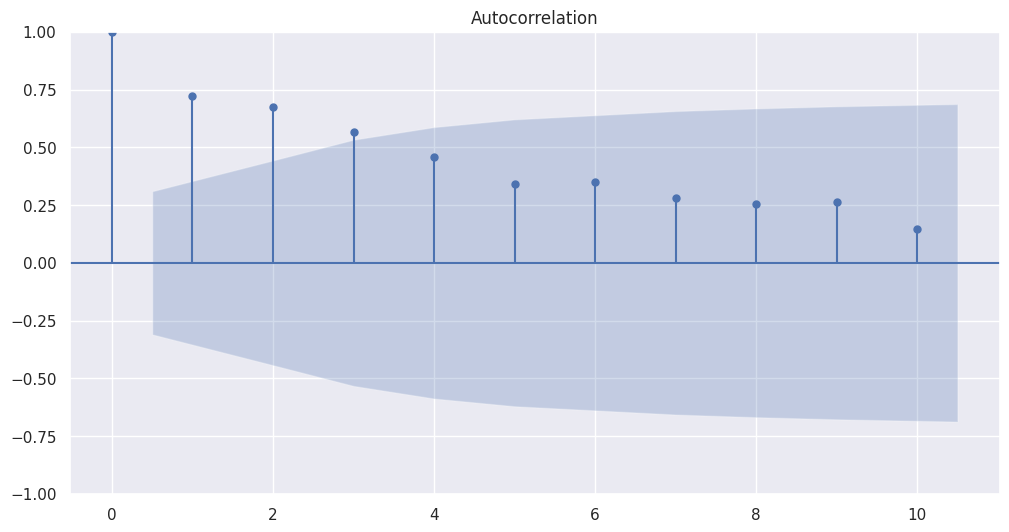

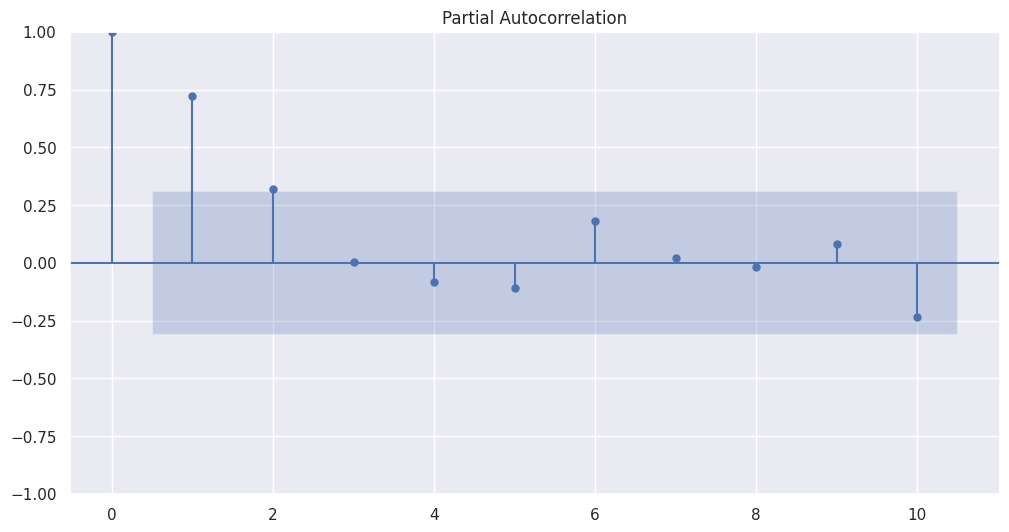

In [145]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf = plot_acf(train_monthly['sales'], lags = 10)
pacf = plot_pacf(train_monthly['sales'], lags =10)

In [146]:
from statsmodels.tsa.ar_model import AutoReg

model_1 = AutoReg(train_monthly, lags = 6).fit()

In [147]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  sales   No. Observations:                   40
Model:                     AutoReg(6)   Log Likelihood                -183.219
Method:               Conditional MLE   S.D. of innovations             52.977
Date:                Sun, 19 Jan 2025   AIC                            382.439
Time:                        18:28:39   BIC                            394.649
Sample:                    07-31-2013   HQIC                           386.603
                         - 04-30-2016                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.4436     41.023      0.937      0.349     -41.960     118.847
sales.L1       0.3973      0.163      2.437      0.015       0.078       0.717
sales.L2       0.4395      0.176      2.493      0.013       0.094       0.785
sales.L3       0.0340      0.188      0.180      0.857      -0.335       0.403
sales.L4      -0.2174      0.188     -1.155      0.248      -0.586       0.151
sales.L5      -0.1319      0.187     -0.706      0.480      -0.498       0.234
sales.L6       0.4166      0.173      2.402      0.016       0.077       0.756
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1643           -0.0000j            1.1643           -0.5000
AR.2           -0.6198           -1.0032j            1.1792           -0.3381
AR.3           -0.6198           +1.0032j            1.1792            0.3381
AR.4            1.0252           -0.0000j            1.0252           -0.0000
AR.5            0.8477           -0.8531j            1.2026           -0.1255
AR.6            0.8477           +0.8531j            1.2026            0.1255
-----------------------------------------------------------------------------
"""

In [148]:
AR_pred = model_1.predict (start = len(train_monthly),
                           end = len(train_monthly) + len(eval_monthly) - 1,
                           dynamic = False
                           )

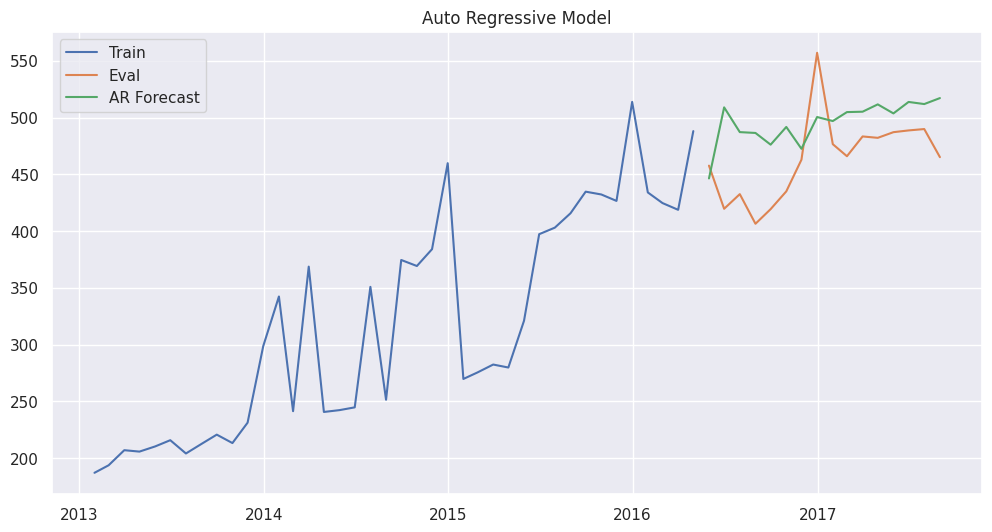

In [149]:
plt.figure(figsize = (12,6))
plt.plot(train_monthly['sales'], label = 'Train')
plt.plot(eval_monthly['sales'], label = 'Eval')
plt.plot (AR_pred, label = 'AR Forecast')
plt.legend(loc='upper left')
plt.title('Auto Regressive Model')
plt.show()

In [150]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

mse = mean_squared_error(eval_monthly, AR_pred)
msle = mean_squared_log_error(eval_monthly, AR_pred)
rmse = np.sqrt(mean_squared_error(eval_monthly, AR_pred )).round(2)
rmsle = np.sqrt(mean_squared_log_error(eval_monthly, AR_pred)).round(2)

results_1 = pd.DataFrame([['AR', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results_1

Model      MSE  MSLE  RMSE  RMSLE
0    AR 2,164.30  0.01 46.52   0.10

***2. ARIMA mode***

In [151]:
# We use pmdarima to determine the best parameter for our ARIMA model.

!pip install pmdarima

In [152]:


from pmdarima import auto_arima

stepwise_fit = auto_arima(train_monthly['sales'], trace = True, suppress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=437.525, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=429.622, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=436.112, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=431.158, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.56 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=429.012, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=430.786, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=430.801, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=429.340, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=432.769, Time=0.17 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 5.963 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   40
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -212.506
Date:                Sun, 19 Jan 2025   AIC                            429.012
Time:                        18:29:15   BIC                            432.339
Sample:                    01-31-2013   HQIC                           430.206
                         - 04-30-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4569      0.116     -3.924      0.000      -0.685      -0.229
sigma2      3145.8666    722.718      4.353      0.000    1729.365    4562.368
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 2.60
Prob(Q):                              0.61   Prob(JB):                         0.27
Heteroskedasticity (H):               1.53   Skew:                            -0.56
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [153]:
from statsmodels.tsa.arima.model import ARIMA

model_2 = ARIMA(train_monthly, order=(1,1,0))
model_2_fit = model_2.fit()
model_2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                   40
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -212.506
Date:                Sun, 19 Jan 2025   AIC                            429.012
Time:                        18:29:19   BIC                            432.339
Sample:                    01-31-2013   HQIC                           430.206
                         - 04-30-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4569      0.116     -3.924      0.000      -0.685      -0.229
sigma2      3145.8666    722.718      4.353      0.000    1729.365    4562.368
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 2.60
Prob(Q):                              0.61   Prob(JB):                         0.27
Heteroskedasticity (H):               1.53   Skew:                            -0.56
Prob(H) (two-sided):                  0.45   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [154]:
# Make predictions on the test data
ARIMA_pred = model_2_fit.predict(start=len(train_monthly),
                                 end=len(train_monthly) + len(eval_monthly) - 1,
                                 typ="levels")

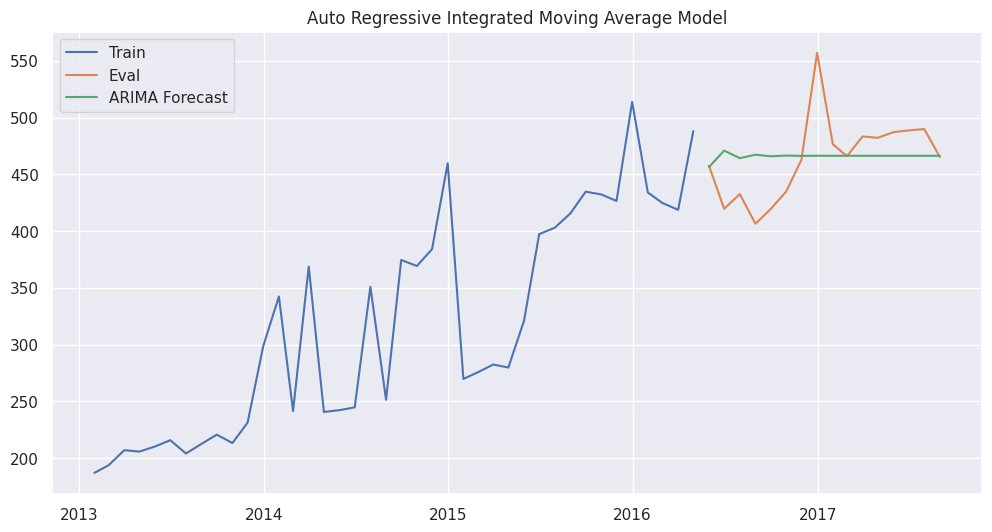

In [155]:
plt.figure(figsize = (12,6))
plt.plot(train_monthly['sales'], label = 'Train')
plt.plot(eval_monthly['sales'], label = 'Eval')
plt.plot (ARIMA_pred, label = 'ARIMA Forecast')
plt.legend(loc='upper left')
plt.title('Auto Regressive Integrated Moving Average Model')
plt.show()

In [156]:
mse = mean_squared_error(eval_monthly, ARIMA_pred)
msle = mean_squared_log_error(eval_monthly, ARIMA_pred)
rmse = np.sqrt(mean_squared_error(eval_monthly, ARIMA_pred )).round(2)
rmsle = np.sqrt(mean_squared_log_error(eval_monthly, ARIMA_pred)).round(2)

model_results = pd.DataFrame([['ARIMA', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results_2 = pd.concat([results_1, model_results], ignore_index=True)
results_2

Model      MSE  MSLE  RMSE  RMSLE
0     AR 2,164.30  0.01 46.52   0.10
1  ARIMA 1,305.08  0.01 36.13   0.08

***3. SARIMA model***

In [157]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_3 = SARIMAX(train_monthly, order=(1,1,0), seasonal_order=(1,0,0,12))
model_3_fit = model_3.fit()
model_3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              sales   No. Observations:                   40
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -211.806
Date:                            Sun, 19 Jan 2025   AIC                            429.613
Time:                                    18:29:50   BIC                            434.603
Sample:                                01-31-2013   HQIC                           431.403
                                     - 04-30-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4776      0.130     -3.682      0.000      -0.732      -0.223
ar.S.L12       0.1908      0.225      0.849      0.396      -0.250       0.631
sigma2      2998.7291    682.025      4.397      0.000    1661.984    4335.474
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 7.07
Prob(Q):                              0.73   Prob(JB):                         0.03
Heteroskedasticity (H):               1.26   Skew:                            -0.76
Prob(H) (two-sided):                  0.68   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [158]:
# Make predictions on the test data
SARIMA_pred = model_3_fit.predict(start=len(train_monthly),
                                 end=len(train_monthly) + len(eval_monthly) - 1,
                                 typ="levels")

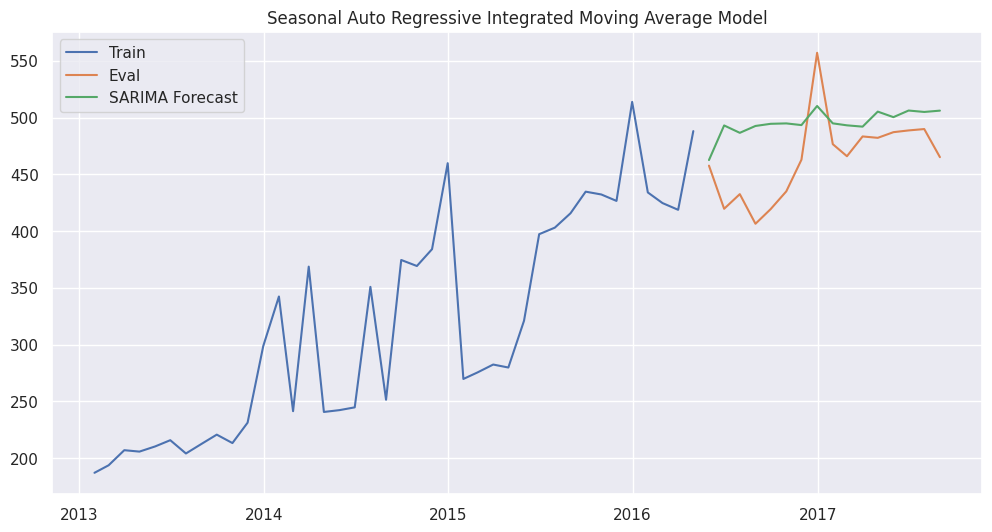

In [159]:
plt.figure(figsize = (12,6))
plt.plot(train_monthly['sales'], label = 'Train')
plt.plot(eval_monthly['sales'], label = 'Eval')
plt.plot (SARIMA_pred, label = 'SARIMA Forecast')
plt.legend(loc='upper left')
plt.title('Seasonal Auto Regressive Integrated Moving Average Model')
plt.show()

In [160]:
mse = mean_squared_error(eval_monthly, SARIMA_pred)
msle = mean_squared_log_error(eval_monthly, SARIMA_pred)
rmse = np.sqrt(mean_squared_error(eval_monthly, SARIMA_pred )).round(2)
rmsle = np.sqrt(mean_squared_log_error(eval_monthly, SARIMA_pred)).round(2)

model_results = pd.DataFrame([['SARIMA', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results_3 = pd.concat([results_2, model_results], ignore_index=True)
results_3

Model      MSE  MSLE  RMSE  RMSLE
0      AR 2,164.30  0.01 46.52   0.10
1   ARIMA 1,305.08  0.01 36.13   0.08
2  SARIMA 2,013.39  0.01 44.87   0.10

# Traditional ML Models

In [161]:
final_train.shape

(3054348, 24)

In [162]:
final_train.reset_index(inplace=True)
final_train.head()

index   id       date  store_nbr  sales  onpromotion  store_cluster  \
0      0 0.00 2013-01-01       1.00   0.00         0.00             13   
1      1 1.00 2013-01-01       1.00   0.00         0.00             13   
2      2 2.00 2013-01-01       1.00   0.00         0.00             13   
3      3 3.00 2013-01-01       1.00   0.00         0.00             13   
4      4 4.00 2013-01-01       1.00   0.00         0.00             13   

   oil_price  events  Year  Month  Day  quarter  week_of_year  day_of_week  \
0      93.14       1  2013      1    1        1             1            1   
1      93.14       1  2013      1    1        1             1            1   
2      93.14       1  2013      1    1        1             1            1   
3      93.14       1  2013      1    1        1             1            1   
4      93.14       1  2013      1    1        1             1            1   

   is_weekend  family_AUTOMOTIVE  family_BEAUTY AND FASHION  \
0           0               1.00                       0.00   
1           0               0.00                       1.00   
2           0               0.00                       1.00   
3           0               0.00                       0.00   
4           0               0.00                       0.00   

   family_BEVERAGES AND LIQUOR  family_FROZEN FOODS  family_GROCERY  \
0                         0.00                 0.00            0.00   
1                         0.00                 0.00            0.00   
2                         0.00                 0.00            0.00   
3                         1.00                 0.00            0.00   
4                         0.00                 0.00            0.00   

   family_HOME AND KITCHEN  family_HOME CARE AND GARDEN  family_PET SUPPLIES  \
0                     0.00                         0.00                 0.00   
1                     0.00                         0.00                 0.00   
2                     0.00                         0.00                 0.00   
3                     0.00                         0.00                 0.00   
4                     0.00                         0.00                 0.00   

   family_SCHOOL AND OFFICE SUPPLIES  
0                               0.00  
1                               0.00  
2                               0.00  
3                               0.00  
4                               1.00

In [163]:
final_train.drop(columns='date', inplace= True)

In [164]:
# Split data into parts
x = final_train.drop(['sales'], axis = 1)
y = final_train['sales']

In [165]:
# Split data into Train Test
X_train, X_test, y_train, y_test = x[0:2000000], x[2000000:], y[0:2000000], y[2000000:]

In [166]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2000000, 23), (1054348, 23), (2000000,), (1054348,))

***4. Linear Regression***

In [167]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
model_lin = lin_model.fit(X_train, y_train)

# Make prediction on X_test
lin_pred = model_lin.predict(X_test)

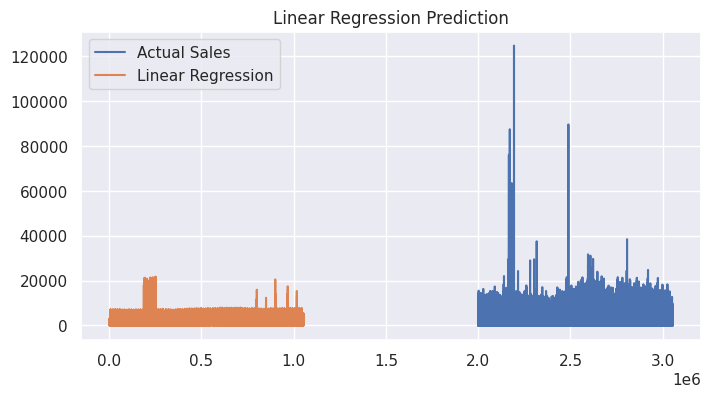

In [168]:
plt.figure(figsize=(8,4))
plt.plot(y_test, label ='Actual Sales')
plt.plot(lin_pred, label='Linear Regression')
plt.legend(loc='best')
plt.title('Linear Regression Prediction')
plt.show()

In [169]:
mse = mean_squared_error(y_test, lin_pred )
rmse = np.sqrt(mean_squared_error(y_test, lin_pred )).round(2)

results = pd.DataFrame([['Linear', mse, rmse]], columns = ['Model', 'MSE', 'RMSE'])
results_4 = pd.concat([results_3, results], ignore_index=True)
results_4

Model          MSE  MSLE     RMSE  RMSLE
0      AR     2,164.30  0.01    46.52   0.10
1   ARIMA     1,305.08  0.01    36.13   0.08
2  SARIMA     2,013.39  0.01    44.87   0.10
3  Linear 1,143,943.05   NaN 1,069.55    NaN

***5. Decision tree***

In [170]:
from sklearn.tree import DecisionTreeRegressor


In [171]:
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree_model = decision_tree.fit(X_train, y_train)

In [172]:
# Make prediction on test

predict_tree = decision_tree.predict(X_test)

<BarContainer object of 23 artists>

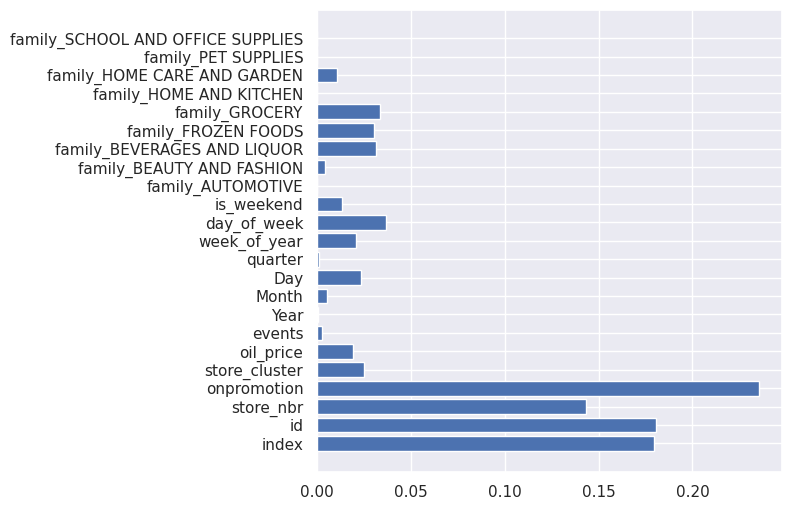

In [173]:
#feature importance

plt.figure(figsize = (6,6))
plt.barh(X_train.columns, decision_tree_model.feature_importances_)

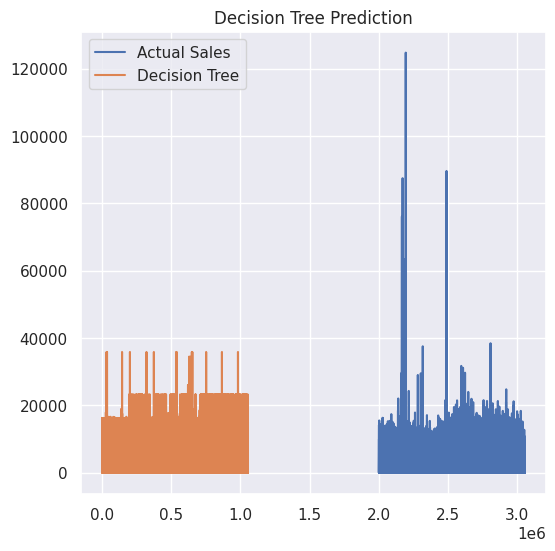

In [174]:
# predicted and actual data

plt.figure(figsize=(6,6))
plt.plot(y_test, label = "Actual Sales")
plt.plot(predict_tree, label = "Decision Tree")
plt.legend(loc = "best")
plt.title("Decision Tree Prediction")
plt.show()

In [175]:
# Evaluation metrics

mse = mean_squared_error(y_test, predict_tree)
msle = mean_squared_log_error(y_test, predict_tree)
rmse = np.sqrt(mean_squared_error(y_test, predict_tree )).round(2)
rmsle = np.sqrt(mean_squared_log_error(y_test, predict_tree)).round(2)

results = pd.DataFrame([['Decision Tree', mse,msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results_5 = pd.concat([results_4, results], ignore_index=True)
results_5

Model          MSE  MSLE     RMSE  RMSLE
0             AR     2,164.30  0.01    46.52   0.10
1          ARIMA     1,305.08  0.01    36.13   0.08
2         SARIMA     2,013.39  0.01    44.87   0.10
3         Linear 1,143,943.05   NaN 1,069.55    NaN
4  Decision Tree 3,552,083.56  5.37 1,884.70   2.32

***6. Xg Boost***

In [176]:
from sklearn.ensemble import GradientBoostingRegressor

In [177]:
xgc = GradientBoostingRegressor(random_state=42)
xg_boost = xgc.fit(X_train, y_train)

In [178]:
# Predicting the Test set results
xg_boost_pred  = xgc.predict(X_test)

<BarContainer object of 23 artists>

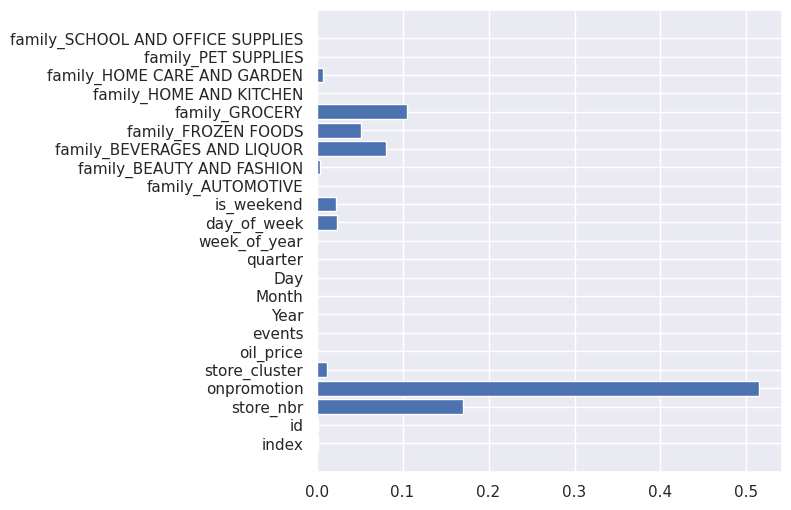

In [179]:
#feature importance

plt.figure(figsize = (6,6))
plt.barh(X_train.columns, xg_boost.feature_importances_)

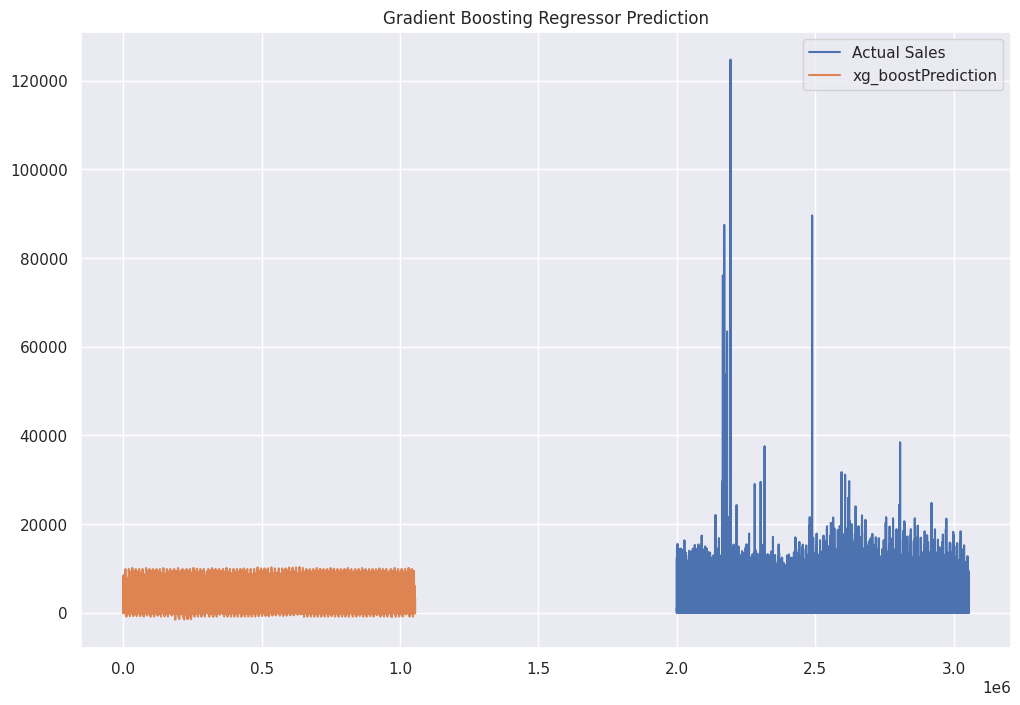

In [180]:
# predicted and actual data

plt.figure(figsize=(12,8))
plt.plot(y_test, label = "Actual Sales")
plt.plot(xg_boost_pred, label = "xg_boostPrediction")
plt.legend(loc = "best")
plt.title("Gradient Boosting Regressor Prediction")
plt.show()

In [181]:
# Evaluation Metrics

mse = mean_squared_error(y_test, xg_boost_pred)
rmse = np.sqrt(mean_squared_error(y_test, xg_boost_pred)).round(2)

results = pd.DataFrame([['XG Boost', mse, rmse]], columns = ['Model', 'MSE', 'RMSE'])
results_6 = pd.concat([results_5, results], ignore_index=True)
results_6

Model          MSE  MSLE     RMSE  RMSLE
0             AR     2,164.30  0.01    46.52   0.10
1          ARIMA     1,305.08  0.01    36.13   0.08
2         SARIMA     2,013.39  0.01    44.87   0.10
3         Linear 1,143,943.05   NaN 1,069.55    NaN
4  Decision Tree 3,552,083.56  5.37 1,884.70   2.32
5       XG Boost 1,356,919.83   NaN 1,164.87    NaN

***7. Random Forest***

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# rf_model = RandomForestRegressor(random_state=42)
# rf_model.fit(X_train, y_train)

In [ ]:
# # Make predictions
# rf_pred = rf_model.predict(X_test)

In [ ]:
# # Feature Importance
# plt.figure(figsize=(6, 6))
# plt.barh(X_train.columns, rf_model.feature_importances_)
# # plt.title("Random Forest Feature Importance")
# # plt.xlabel("Feature Importance")
# # plt.ylabel("Features")
# # plt.show()

In [ ]:
# # Plot predicted vs actual
# plt.figure(figsize=(12, 8))
# plt.plot(y_test, label="Actual Sales")
# plt.plot(rf_pred, label="Random Forest Prediction")
# plt.legend(loc="best")
# plt.title("Random Forest Prediction")
# plt.show()

In [ ]:
# # Evaluation metrics
# from sklearn.metrics import mean_squared_error, mean_squared_log_error
# mse = mean_squared_error(y_test, rf_pred)
# msle = mean_squared_log_error(y_test, rf_pred)
# rmse = np.sqrt(mean_squared_error(y_test, rf_pred)).round(2)
# rmsle = np.sqrt(mean_squared_log_error(y_test, rf_pred)).round(2)

# results = pd.DataFrame([['Random Forest', mse, msle, rmse, rmsle]],
#                        columns=['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
# results_6 = pd.concat([results_5, results], ignore_index=True)
# results_6

In [182]:
merged_monthly_mean


sales
date             
2013-01-31 186.95
2013-02-28 193.58
2013-03-31 206.88
2013-04-30 205.64
2013-05-31 210.18
2013-06-30 215.69
2013-07-31 203.98
2013-08-31 212.48
2013-09-30 220.59
2013-10-31 213.16
2013-11-30 231.14
2013-12-31 298.68
2014-01-31 342.34
2014-02-28 241.27
2014-03-31 368.66
2014-04-30 240.58
2014-05-31 242.20
2014-06-30 244.63
2014-07-31 350.83
2014-08-31 251.35
2014-09-30 374.53
2014-10-31 369.21
2014-11-30 384.06
2014-12-31 459.82
2015-01-31 269.67
2015-02-28 275.42
2015-03-31 282.37
2015-04-30 279.74
2015-05-31 320.96
2015-06-30 397.25
2015-07-31 403.03
2015-08-31 415.69
2015-09-30 434.73
2015-10-31 432.25
2015-11-30 426.58
2015-12-31 513.85
2016-01-31 434.05
2016-02-29 424.70
2016-03-31 418.74
2016-04-30 488.11
2016-05-31 457.67
2016-06-30 419.64
2016-07-31 432.56
2016-08-31 406.44
2016-09-30 419.33
2016-10-31 435.00
2016-11-30 462.92
2016-12-31 557.11
2017-01-31 476.60
2017-02-28 465.97
2017-03-31 483.40
2017-04-30 482.17
2017-05-31 487.16
2017-06-30 488.71
2017-07-31 489.91
2017-08-31 465.14

In [183]:
backtests = {
    1: ('2017-05-31', '2017-06-30'),
    2: ('2017-06-30', '2017-07-31'),
    3: ('2017-07-31', '2017-08-31')
}

# Backtests with ARIMA Model
scores = {}

for period in backtests.values():

    # Convert date strings to datetime objects
    start_date = pd.to_datetime(period[0])
    end_date = pd.to_datetime(period[1])

    # Filter the DataFrame based on datetime comparisons
    _train = merged_monthly_mean.reset_index()[merged_monthly_mean.reset_index()['date'] < start_date]
    _test = merged_monthly_mean.reset_index()[(merged_monthly_mean.reset_index()['date'] >= start_date) & (merged_monthly_mean.reset_index()['date'] <= end_date)]

    Xtrain = _train.sales.values
    Xtest = _test.sales.values

    try:
        model = ARIMA(Xtrain, order=(1, 1, 0)).fit()

        # Initialize an empty array to store predictions
        ypred = []

        # Iterate through each data point in the test set and predict one step ahead
        for i in range(len(Xtest)):
            # Predict one step ahead by retraining the model
            ARIMA_model = ARIMA(Xtrain, order=(1, 1, 0)).fit()
            prediction = ARIMA_model.forecast(steps=1)[0]

            # Append the prediction to the result
            ypred.append(prediction)

            # Update the training data with the actual value
            Xtrain = np.append(Xtrain, Xtest[i])

        # Calculate RMSLE for the entire period
        rmsle = np.sqrt(mean_squared_log_error(Xtest, ypred))
        scores[str(period)] = rmsle
    except Exception as e:
        print(f"Error in period {period}: {str(e)}")

print(scores)

{"('2017-05-31', '2017-06-30')": 0.008402829692383674, "('2017-06-30', '2017-07-31')": 0.005966513027760933, "('2017-07-31', '2017-08-31')": 0.03596285186330578}


***Predictions***

In [184]:
merged_monthly_mean.index = pd.to_datetime(merged_monthly_mean.index)

merged_monthly_mean.index.max()

Timestamp('2017-08-31 00:00:00')

In [185]:
# Define the last observed date
last_observed_date = pd.to_datetime("2017-08-31")

# Define the end date of the year
end_of_year = pd.to_datetime("2017-12-31")

# Create a list of future dates for prediction (monthly frequency)
future_dates = pd.date_range(start=last_observed_date + pd.DateOffset(months=1), end=end_of_year, freq='M')

# Make predictions for future dates
# Replace 'steps' with the number of future predictions you want
predictions = ARIMA_model.forecast(steps=len(future_dates))

# Create a DataFrame to store predictions and dates
future_predictions = pd.DataFrame({'date': future_dates, 'predicted_sales': predictions})

# Print or save the predictions for analysis
print(future_predictions)

        date  predicted_sales
0 2017-09-30           489.40
1 2017-10-31           489.62
2 2017-11-30           489.52
3 2017-12-31           489.56
